In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# cd /content/drive/MyDrive/BANK X/Dataset

/content/drive/MyDrive/BANK X/Dataset


In [3]:
# !pip install pandas-downcast
# !pip install plotly_express==0.4.0

In [4]:
import pandas as pd
import pdcast as pdc
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px

# Data Loading

In [5]:
app_train = pd.read_csv("loan_applications_train.csv")
# app_test  = pd.read_csv("loan_applications_test.csv")
bureau  = pd.read_csv("previous_credits.csv")
bureau_balance  = pd.read_csv("credit_bureau_balance.csv")
prev  = pd.read_csv("previous_loan_applications.csv")
cc  = pd.read_csv("previous_credit_cards.csv")
pos  = pd.read_csv("previous_pos_cash_loans.csv")
ins  = pd.read_csv("repayment_history.csv")

# Demonstrating the shrink percentage after the downcast of dataframes

In [6]:

#Demonstrating the shrink percentage after the downcast of dataframes
df = app_train
size_pre = df.memory_usage(deep=True).sum()
df_post = pdc.downcast(df)
size_post = df_post.memory_usage(deep=True).sum()
shrinkage = int((1 - (size_post / size_pre)) * 100)
print("size_pre", size_pre, "\nsize_post", size_post, "\nshrink_pct", shrinkage)

size_pre 562761929 
size_post 93190732 
shrink_pct 83


# Downcast all dataframes

In [7]:

#downcast all dataframes
app_train = pdc.downcast(app_train)
bureau = pdc.downcast(bureau)
prev = pdc.downcast(prev)
pos = pdc.downcast(pos)
cc = pdc.downcast(cc)
ins = pdc.downcast(ins)
bureau_balance = pdc.downcast(bureau_balance)

# One-Hot Encoding

In [8]:

#Perform one hot encoding on dataframes

app_train = pd.get_dummies(app_train, columns=app_train.select_dtypes(include=['category']).columns)
bureau = pd.get_dummies(bureau, columns=bureau.select_dtypes(include=['category']).columns)
prev = pd.get_dummies(prev, columns=prev.select_dtypes(include=['category']).columns)
pos = pd.get_dummies(pos, columns=pos.select_dtypes(include=['category']).columns)
ins = pd.get_dummies(ins, columns=ins.select_dtypes(include=['category']).columns)
cc = pd.get_dummies(cc, columns=cc.select_dtypes(include=['category']).columns)
bureau_balance = pd.get_dummies(bureau_balance, columns=bureau_balance.select_dtypes(include=['category']).columns)


# Dataframes Information

In [9]:

#No more category type generated by the downcast method
app_train.select_dtypes(exclude="number")

target  flag_mobil  flag_emp_phone  flag_work_phone  flag_cont_mobile  \
0         True        True            True            False              True   
1        False        True            True            False              True   
2        False        True            True             True              True   
3        False        True            True            False              True   
4        False        True            True            False              True   
...        ...         ...             ...              ...               ...   
307506   False        True            True            False              True   
307507   False        True           False            False              True   
307508   False        True            True            False              True   
307509    True        True            True            False              True   
307510   False        True            True             True              True   

        flag_phone  flag_email  reg_region_not_live_region  \
0             True       False                       False   
1             True       False                       False   
2             True       False                       False   
3            False       False                       False   
4            False       False                       False   
...            ...         ...                         ...   
307506       False       False                       False   
307507        True       False                       False   
307508       False        True                       False   
307509       False       False                       False   
307510        True       False                       False   

        reg_region_not_work_region  live_region_not_work_region  ...  \
0                            False                        False  ...   
1                            False                        False  ...   
2                            False                        False  ...   
3                            False                        False  ...   
4                            False                        False  ...   
...                            ...                          ...  ...   
307506                       False                        False  ...   
307507                       False                        False  ...   
307508                       False                        False  ...   
307509                       False                        False  ...   
307510                       False                        False  ...   

        flag_document_12  flag_document_13  flag_document_14  \
0                  False             False             False   
1                  False             False             False   
2                  False             False             False   
3                  False             False             False   
4                  False             False             False   
...                  ...               ...               ...   
307506             False             False             False   
307507             False             False             False   
307508             False             False             False   
307509             False             False             False   
307510             False             False             False   

        flag_document_15  flag_document_16  flag_document_17  \
0                  False             False             False   
1                  False             False             False   
2                  False             False             False   
3                  False             False             False   
4                  False             False             False   
...                  ...               ...               ...   
307506             False             False             False   
307507             False             False             False   
307508             False             False             False   
307509          

In [10]:
app_train.head()

sk_id_curr  target  cnt_children  amt_income_total  amt_credit  \
0      100002    True             0          202500.0    406597.5   
1      100003   False             0          270000.0   1293502.5   
2      100004   False             0           67500.0    135000.0   
3      100006   False             0          135000.0    312682.5   
4      100007   False             0          121500.0    513000.0   

   amt_annuity  amt_goods_price  region_population_relative  days_birth  \
0      24700.5         351000.0                    0.018801       -9461   
1      35698.5        1129500.0                    0.003541      -16765   
2       6750.0         135000.0                    0.010032      -19046   
3      29686.5         297000.0                    0.008019      -19005   
4      21865.5         513000.0                    0.028663      -19932   

   days_employed  ...  housetype_mode_terraced house  \
0           -637  ...                              0   
1          -1188  ...                              0   
2           -225  ...                              0   
3          -3039  ...                              0   
4          -3038  ...                              0   

   wallsmaterial_mode_Block  wallsmaterial_mode_Mixed  \
0                         0                         0   
1                         1                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   wallsmaterial_mode_Monolithic  wallsmaterial_mode_Others  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   wallsmaterial_mode_Panel  wallsmaterial_mode_Stone, brick  \
0                         0                                1   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   wallsmaterial_mode_Wooden  emergencystate_mode_No  emergencystate_mode_Yes  
0                          0                       1                        0  
1                          0                       1                        0  
2                          0                       0                        0  
3                          0                       0                        0  
4                          0                       0                        0  

[5 rows x 246 columns]

In [11]:
bureau.dtypes

sk_id_curr                                                   uint32
sk_id_bureau                                                 uint32
days_credit                                                   int16
credit_day_overdue                                           uint16
days_credit_enddate                                           Int32
days_enddate_fact                                             Int32
amt_credit_max_overdue                                      float32
cnt_credit_prolong                                            uint8
amt_credit_sum                                              float32
amt_credit_sum_debt                                         float32
amt_credit_sum_limit                                        float32
amt_credit_sum_overdue                                      float32
days_credit_update                                            int32
amt_annuity                                                 float32
credit_active_Active                            

# Aggregation and Merging with App Train

In [12]:
#group by id and perform an aggregation function to have unique ids
bureau_avg = bureau.groupby('sk_id_curr').mean()
bureau_avg['b_count'] = bureau[['sk_id_bureau','sk_id_curr']].groupby('sk_id_curr').count()['sk_id_bureau']
#Rename columns
bureau_avg.columns = ['bureau_' + col for col in bureau_avg.columns]
#Merge app train with bureau average
df = df.merge(bureau_avg.reset_index(), how='left', on='sk_id_curr')

# Aggregation and Merging with Previous Applications

In [13]:
#group by id and perform an aggregation function to have unique ids
prev_apps_count = prev[['sk_id_curr', 'sk_id_prev']].groupby('sk_id_curr').count()
prev['sk_id_prev'] = prev['sk_id_curr'].map(prev_apps_count['sk_id_prev'])
prev_apps_avg = prev.groupby('sk_id_curr').mean()
#Renaming columns
prev_apps_avg.columns = ['prev_apps_' + col for col in prev_apps_avg.columns]
#Merge previous df with prev_apps_avg
df = df.merge(prev_apps_avg.reset_index(), how='left', on='sk_id_curr')

# Aggregation and Merging with Pos Cash Loans

In [14]:
pos_count = pos[['sk_id_curr', 'sk_id_prev']].groupby('sk_id_curr').count()
pos['sk_id_prev'] = pos['sk_id_curr'].map(pos_count['sk_id_prev'])
#group by id and perform an aggregation function to have unique ids
pos_avg = pos.groupby('sk_id_curr').mean()
#Merge previous df with pos_avg
df = df.merge(pos_avg.reset_index(), how='left', on='sk_id_curr')

# Aggregation and Merging with Repayment History

In [15]:
#group by id and perform an aggregation function to have unique ids

cnt_inst = ins[['sk_id_curr', 'sk_id_prev']].groupby('sk_id_curr').count()
ins['sk_id_prev'] = ins['sk_id_curr'].map(cnt_inst['sk_id_prev'])
avg_inst = ins.groupby('sk_id_curr').mean()
#Renaming columns
avg_inst.columns = ['inst_' + col for col in avg_inst.columns]
#Merge previous df  with avg_inst
df = df.merge(avg_inst.reset_index(), how='left', on='sk_id_curr')

# Aggregation and Merging with Credit Cards

In [16]:
nb_prevs = cc[['sk_id_curr', 'sk_id_prev']].groupby('sk_id_curr').count()
cc['sk_id_prev'] = cc['sk_id_curr'].map(nb_prevs['sk_id_prev'])
#group by id and perform an aggregation function to have unique ids
avg_cc_bal = cc.groupby('sk_id_curr').mean()
#Renaming columns
avg_cc_bal.columns = ['cc_bal_' + col for col in avg_cc_bal.columns]
#Merge previous df with avg_cc_bal
df = df.merge(avg_cc_bal.reset_index(), how='left', on='sk_id_curr')

# Dataframe Information

In [17]:
df.shape

(307511, 372)

In [18]:
# We end up with a merged dataframe df
df.info

<bound method DataFrame.info of         sk_id_curr  target name_contract_type code_gender flag_own_car  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       flag_own_realty  cnt_children  amt_income_total  amt_credit  \
0        

In [19]:
df.head()

sk_id_curr  target name_contract_type code_gender flag_own_car  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  flag_own_realty  cnt_children  amt_income_total  amt_credit  amt_annuity  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  cc_bal_cnt_instalment_mature_cum cc_bal_sk_dpd cc_bal_sk_dpd_def  \
0  ...                              <NA>           NaN               NaN   
1  ...                              <NA>           NaN               NaN   
2  ...                              <NA>           NaN               NaN   
3  ...                               0.0           0.0               0.0   
4  ...                              <NA>           NaN               NaN   

  cc_bal_name_contract_status_Active cc_bal_name_contract_status_Approved  \
0                                NaN                                  NaN   
1                                NaN                                  NaN   
2                                NaN                                  NaN   
3                                1.0                                  0.0   
4                                NaN                                  NaN   

  cc_bal_name_contract_status_Completed  cc_bal_name_contract_status_Demand  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   0.0                                 0.0   
4                                   NaN                                 NaN   

   cc_bal_name_contract_status_Refused  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  0.0   
4                                  NaN   

   cc_bal_name_contract_status_Sent proposal  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        0.0   
4                                        NaN   

   cc_bal_name_contract_status_Signed  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 0.0  
4                                 NaN  

[5 rows x 372 columns]

#**Data description**

In [21]:
def data_describe(df):
    '''Check the number of rows, columns, missing values and duplicates.
       Count type of columns.
       Memory indication'''

    data_dict = {}
    data = df
    data_dict["merged dataframe"] = [data.shape[0],
                           data.shape[1],
                            round(data.isna().sum().sum()/data.size*100, 2),
                            round(data.duplicated().sum().sum()/data.size*100, 2),
                            data.select_dtypes(include=['object']).shape[1],
                            data.select_dtypes(include=['float']).shape[1],
                            data.select_dtypes(include=['int']).shape[1],
                            data.select_dtypes(include=['bool']).shape[1],
                            round(data.memory_usage().sum()/1024**2, 3)]

    comparative_table = pd.DataFrame.from_dict(data = data_dict,
                                                   columns = ['Rows', 'Columns', '%NaN', '%Duplicate',
                                                              'object_dtype','float_dtype', 'int_dtype',
                                                              'bool_dtype', 'MB_Memory'],
                                                   orient='index')
    print("SUMMARY FILES…")
    return(comparative_table)

In [22]:
data_describe(df)

SUMMARY FILES…


Rows  Columns   %NaN  %Duplicate  object_dtype  \
merged dataframe  307511      372  18.49         0.0            16   

                  float_dtype  int_dtype  bool_dtype  MB_Memory  
merged dataframe          315         41           0    848.123

# As we can see 18% of the values stored are nan values wich is relatively high, and the number of columns is also high

---



# Target Distribution

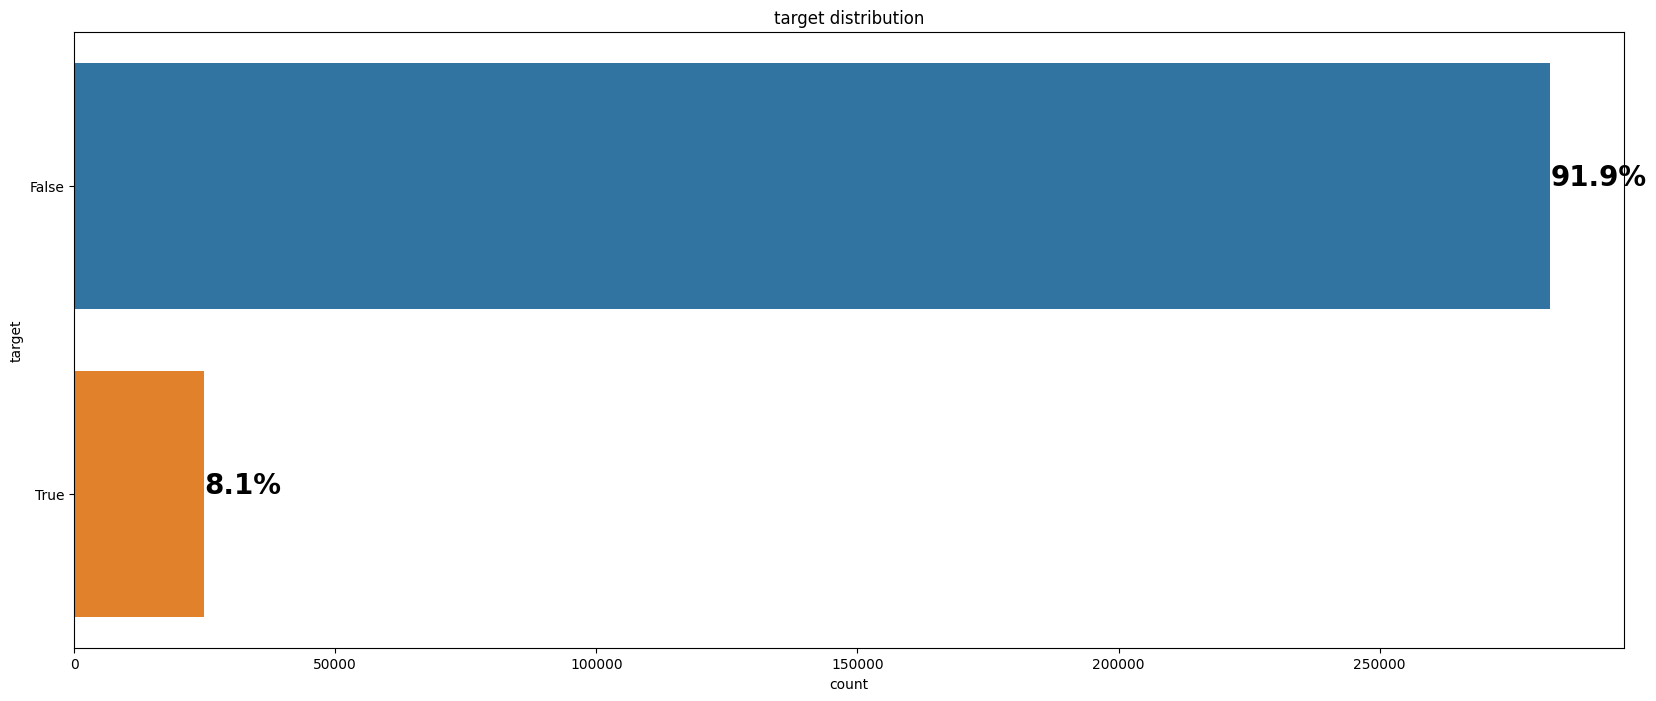

In [23]:
ax, fig = plt.subplots(figsize=(20,8))
ax = sns.countplot(y='target', data=app_train)
ax.set_title("target distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(app_train.target))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

plt.show()

# Age distribution :

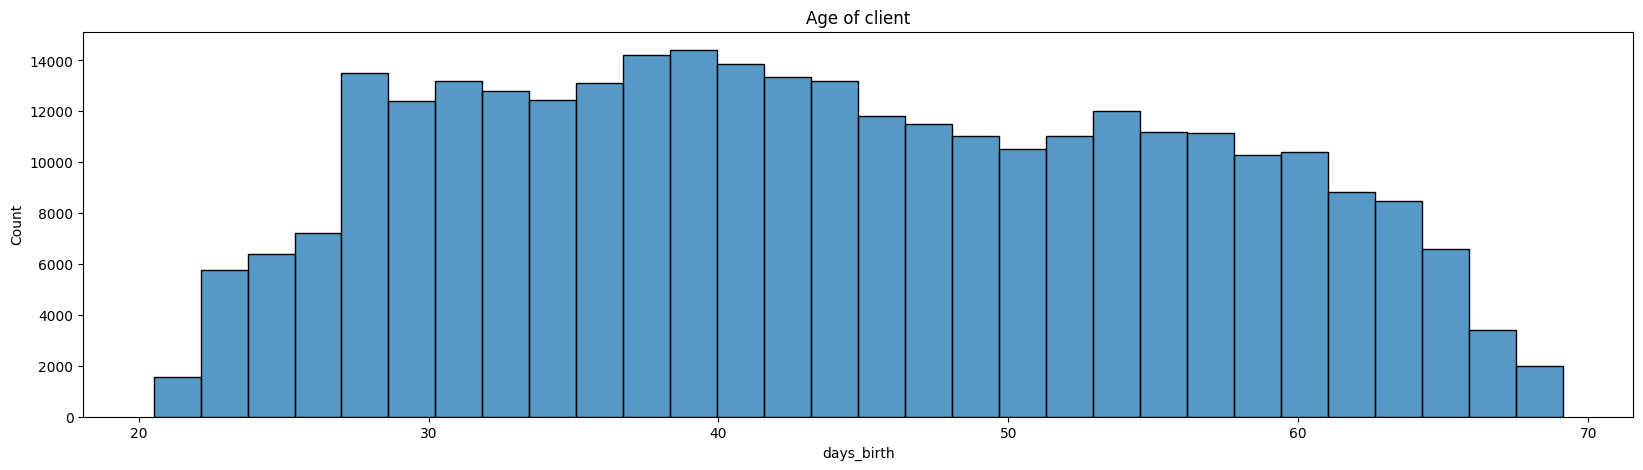

In [24]:
(df['days_birth'] / -365).describe() #normalizing the age
plt.figure(figsize=(20, 5))
sns.histplot((df['days_birth'] / -365), bins = 30).set_title('Age of client')
plt.show()

# Distribution of AMT_GOODS_PRICE

# Exploring missing values

In [27]:
def nan_stats(data):
    total = data.isnull().sum()
    percent= np.round(data.isnull().sum()/data.isnull().count()*100, 2)
    nan_stats = pd.concat([total, percent],
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return nan_stats

top_50_nan = nan_stats(df)[:50]



Index(['Total', '%'], dtype='object')

Plotting columns and nan value percentages



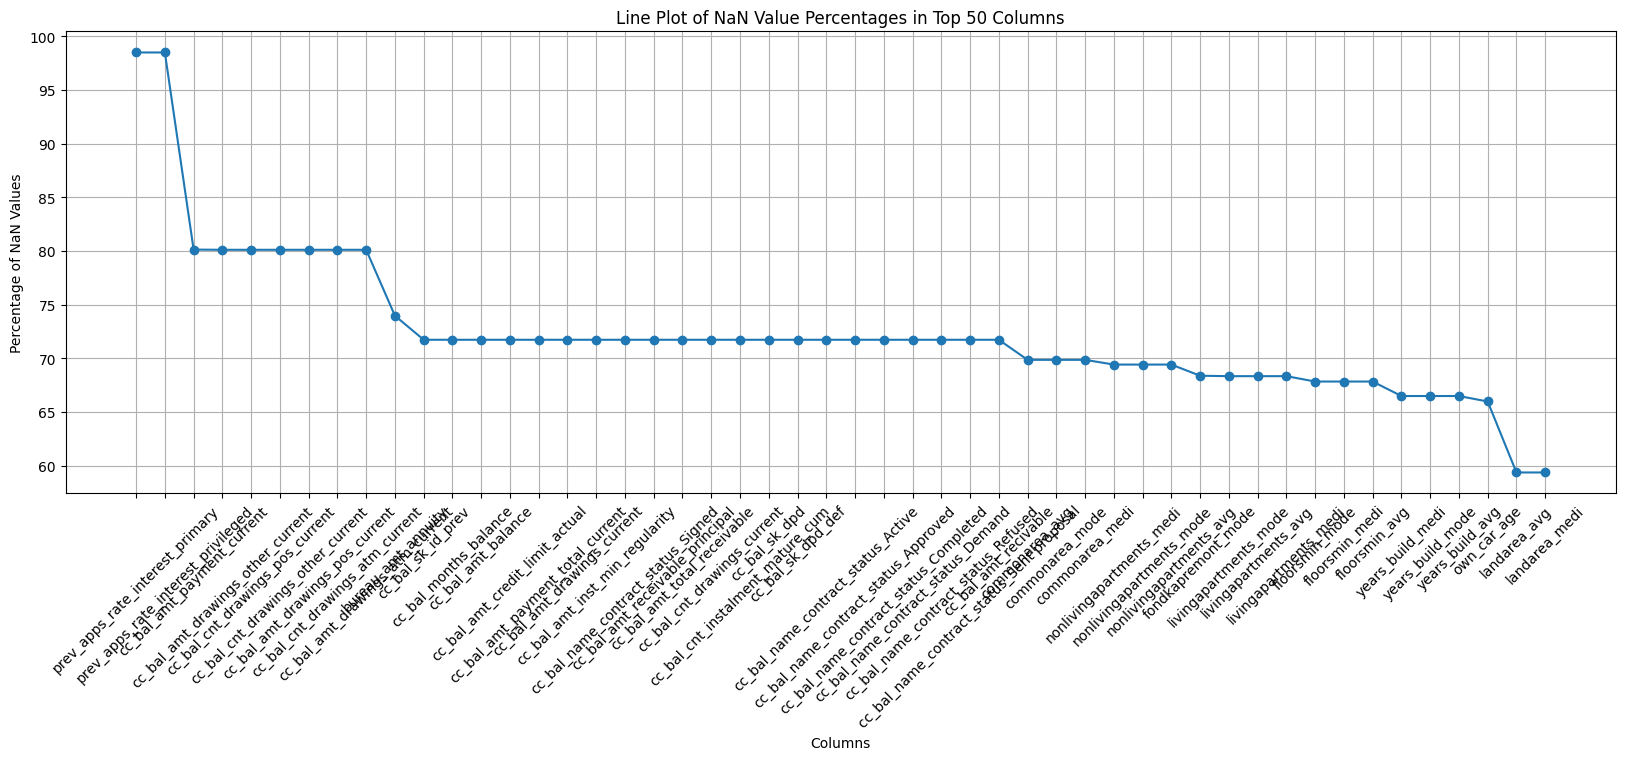

In [32]:

# Create the line plot
plt.figure(figsize=(20, 6))
plt.plot(top_50_nan.index, top_50_nan['%'], marker='o')  # 'o' for circular markers

plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN Values')
plt.title('Line Plot of NaN Value Percentages in Top 50 Columns')
plt.grid(True)  # Adding a grid for better readability

# Show the plot
plt.show()

In [33]:
# Detect highly missing numeric features
application_train_numeric= df.select_dtypes(include=['number'])
missings=application_train_numeric.loc[:,application_train_numeric.isna().mean() >= 0.6]
highly_missing_features = missings.columns
missings.columns

Index(['own_car_age', 'years_build_avg', 'commonarea_avg', 'floorsmin_avg',
       'livingapartments_avg', 'nonlivingapartments_avg', 'years_build_mode',
       'commonarea_mode', 'floorsmin_mode', 'livingapartments_mode',
       'nonlivingapartments_mode', 'years_build_medi', 'commonarea_medi',
       'floorsmin_medi', 'livingapartments_medi', 'nonlivingapartments_medi',
       'bureau_amt_annuity', 'prev_apps_rate_interest_primary',
       'prev_apps_rate_interest_privileged', 'cc_bal_sk_id_prev',
       'cc_bal_months_balance', 'cc_bal_amt_balance',
       'cc_bal_amt_credit_limit_actual', 'cc_bal_amt_drawings_atm_current',
       'cc_bal_amt_drawings_current', 'cc_bal_amt_drawings_other_current',
       'cc_bal_amt_drawings_pos_current', 'cc_bal_amt_inst_min_regularity',
       'cc_bal_amt_payment_current', 'cc_bal_amt_payment_total_current',
       'cc_bal_amt_receivable_principal', 'cc_bal_amt_recivable',
       'cc_bal_amt_total_receivable', 'cc_bal_cnt_drawings_atm_current',
  

In [34]:
#Remove highly missing features
df.drop(highly_missing_features,axis=1,inplace=True)

# Imputing Nan values

In [35]:
features_train = df
# Impute numerical features using mean imputation
numeric_imputer = SimpleImputer(strategy='median')
numeric_features_train = features_train.select_dtypes(include='number')
imputed_numeric_features_train_array = numeric_imputer.fit_transform(numeric_features_train)

# Convert the numpy array to a DataFrame
imputed_numeric_features_train_df = pd.DataFrame(imputed_numeric_features_train_array, columns=numeric_features_train.columns)



for col in imputed_numeric_features_train_df.columns :
  df[col] = imputed_numeric_features_train_df[col]


# Display the resulting DataFrame
print("DataFrame after imputation:")
imputed_numeric_features_train_df.head()


DataFrame after imputation:


sk_id_curr  target  cnt_children  amt_income_total  amt_credit  \
0    100002.0     1.0           0.0          202500.0    406597.5   
1    100003.0     0.0           0.0          270000.0   1293502.5   
2    100004.0     0.0           0.0           67500.0    135000.0   
3    100006.0     0.0           0.0          135000.0    312682.5   
4    100007.0     0.0           0.0          121500.0    513000.0   

   amt_annuity  amt_goods_price  region_population_relative  days_birth  \
0      24700.5         351000.0                    0.018801     -9461.0   
1      35698.5        1129500.0                    0.003541    -16765.0   
2       6750.0         135000.0                    0.010032    -19046.0   
3      29686.5         297000.0                    0.008019    -19005.0   
4      21865.5         513000.0                    0.028663    -19932.0   

   days_employed  ...  name_contract_status_Returned to the store  \
0         -637.0  ...                                    0.000000   
1        -1188.0  ...                                    0.000000   
2         -225.0  ...                                    0.000000   
3        -3039.0  ...                                    0.047619   
4        -3038.0  ...                                    0.000000   

   name_contract_status_Signed  name_contract_status_XNA  inst_sk_id_prev  \
0                     0.000000                       0.0             19.0   
1                     0.000000                       0.0             25.0   
2                     0.000000                       0.0              3.0   
3                     0.000000                       0.0             16.0   
4                     0.015152                       0.0             66.0   

   inst_num_instalment_version  inst_num_instalment_number  \
0                     1.052632                   10.000000   
1                     1.040000                    5.080000   
2                     1.333333                    2.000000   
3                     1.125000                    4.437500   
4                     1.166667                    7.045455   

   inst_days_instalment  inst_days_entry_payment  inst_amt_instalment  \
0           -295.000000              -315.421053         11559.247070   
1          -1378.160000             -1385.320000         64754.585938   
2           -754.000000              -761.666667          7096.154785   
3           -252.250000              -271.625000         62947.089844   
4          -1028.606061             -1032.242424         12666.444336   

   inst_amt_payment  
0      11559.247070  
1      64754.585938  
2       7096.154785  
3      62947.089844  
4      12214.059570  

[5 rows x 309 columns]

In [36]:
data_describe(df)

SUMMARY FILES…


Rows  Columns  %NaN  %Duplicate  object_dtype  \
merged dataframe  307511      325  0.76         0.0            16   

                  float_dtype  int_dtype  bool_dtype  MB_Memory  
merged dataframe          309          0           0    764.836

In [37]:
nan_stats(df)

Total      %
fondkapremont_mode             210295  68.39
wallsmaterial_mode             156341  50.84
housetype_mode                 154297  50.18
emergencystate_mode            145755  47.40
occupation_type                 96391  31.35
...                               ...    ...
bureau_amt_credit_max_overdue       0   0.00
bureau_days_enddate_fact            0   0.00
bureau_days_credit_enddate          0   0.00
bureau_credit_day_overdue           0   0.00
inst_amt_payment                    0   0.00

[325 rows x 2 columns]

# Reducing the number of columns for flag_document

It is simpler to keep track of the number of the total number of documents provided rather than if each one of the 20 documents is provided or not. In this step we aggregate all the 20 documents into one column that counts the number of provided documents.

In [38]:
flag_document = ['flag_document_2', 'flag_document_3', 'flag_document_4', 'flag_document_5',
                 'flag_document_6', 'flag_document_7', 'flag_document_8', 'flag_document_9',
                 'flag_document_10', 'flag_document_11', 'flag_document_12', 'flag_document_13',
                 'flag_document_14', 'flag_document_15', 'flag_document_16', 'flag_document_17',
                 'flag_document_18', 'flag_document_19', 'flag_document_20', 'flag_document_21']
df['FLAG_DOCUMENT']=df[flag_document].sum(axis=1)
df.drop(flag_document,axis=1,inplace=True)

# Correlation factors

In [39]:


# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Create an interactive heatmap
fig = px.imshow(corr_matrix, text_auto=True, aspect="auto",
                color_continuous_scale='RdBu', origin='lower')

# Update layout for better readability
fig.update_layout(width=800, height=800, title="Interactive Correlation Matrix Heatmap -- All columns")

# Show the plot
fig.show()

<ipython-input-39-1bdfcbbaf155>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [40]:
threshold = 0.8
columns_with_high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            columns_with_high_corr.add(corr_matrix.columns[i])
            columns_with_high_corr.add(corr_matrix.columns[j])

filtered_corr_matrix = corr_matrix.loc[columns_with_high_corr, columns_with_high_corr]



<ipython-input-40-e7044002ec44>:9: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



In [41]:
# Create an interactive heatmap
fig = px.imshow(filtered_corr_matrix, text_auto=True, aspect="auto",
                color_continuous_scale='RdBu', origin='lower')

# Update layout for better readability
fig.update_layout(width=800, height=800, title="Interactive Correlation Matrix Heatmap - Highly correlated columns")

# Show the plot
fig.show()

# Dropping highly correlated columns

In [42]:
# Identify pairs of highly correlated columns
cols_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            cols_to_drop.add(colname)

cols_to_drop

{'amt_goods_price',
 'apartments_medi',
 'apartments_mode',
 'basementarea_medi',
 'basementarea_mode',
 'bureau_credit_active_Closed',
 'bureau_credit_currency_currency 2',
 'bureau_credit_type_Credit card',
 'cnt_fam_members',
 'cnt_instalment_future',
 'def_60_cnt_social_circle',
 'elevators_avg',
 'elevators_medi',
 'elevators_mode',
 'entrances_medi',
 'entrances_mode',
 'flag_emp_phone',
 'floorsmax_medi',
 'floorsmax_mode',
 'inst_amt_payment',
 'inst_days_entry_payment',
 'inst_days_instalment',
 'landarea_medi',
 'landarea_mode',
 'live_city_not_work_city',
 'live_region_not_work_region',
 'livingarea_avg',
 'livingarea_medi',
 'livingarea_mode',
 'months_balance',
 'name_contract_status_Completed',
 'nonlivingarea_medi',
 'nonlivingarea_mode',
 'obs_60_cnt_social_circle',
 'prev_apps_amt_credit',
 'prev_apps_amt_goods_price',
 'prev_apps_channel_type_Car dealer',
 'prev_apps_code_reject_reason_CLIENT',
 'prev_apps_code_reject_reason_XAP',
 'prev_apps_days_last_due_1st_version

In [43]:
print("the number of columns that we will drop :")
len(cols_to_drop)

the number of columns that we will drop :


65

In [44]:
df.drop(filtered_corr_matrix, axis=1, inplace=True)
data_describe(df)

SUMMARY FILES…


Rows  Columns  %NaN  %Duplicate  object_dtype  \
merged dataframe  307511      202  1.23         0.0            16   

                  float_dtype  int_dtype  bool_dtype  MB_Memory  
merged dataframe          186          0           0    476.263

# As we can see we Reduced the number of columns to 202 with a relatively low nan value percentage

In [45]:
nan_stats(df)[:20]

Total      %
fondkapremont_mode                                  210295  68.39
wallsmaterial_mode                                  156341  50.84
housetype_mode                                      154297  50.18
emergencystate_mode                                 145755  47.40
occupation_type                                      96391  31.35
name_type_suite                                       1292   0.42
sk_id_curr                                               0   0.00
prev_apps_name_goods_category_Education                  0   0.00
prev_apps_name_goods_category_Audio/Video                0   0.00
prev_apps_name_goods_category_Auto Accessories           0   0.00
prev_apps_name_goods_category_Computers                  0   0.00
prev_apps_name_goods_category_Construction Mate...       0   0.00
prev_apps_name_goods_category_Consumer Electronics       0   0.00
prev_apps_name_goods_category_Direct Sales               0   0.00
prev_apps_name_goods_category_Fitness                    0   0.00
prev_apps_name_goods_category_Additional Service         0   0.00
prev_apps_name_goods_category_Gardening                  0   0.00
prev_apps_name_goods_category_Homewares                  0   0.00
prev_apps_name_goods_category_House Construction         0   0.00
prev_apps_name_goods_category_Insurance                  0   0.00

only 4 columns are responsible for nan values

# Plotting  Data

In [46]:
#defining two functions to plot statistics of different features
def plot_stat(data, feature, title) :

    ax, fig = plt.subplots(figsize=(20,8))
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

def plot_percent_target1(data, feature, title) :

    cat_perc = data[[feature, 'target']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    ax, fig = plt.subplots(figsize=(20,8))
    ax = sns.barplot(y=feature, x='target', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    plt.show()

# Type of contract description

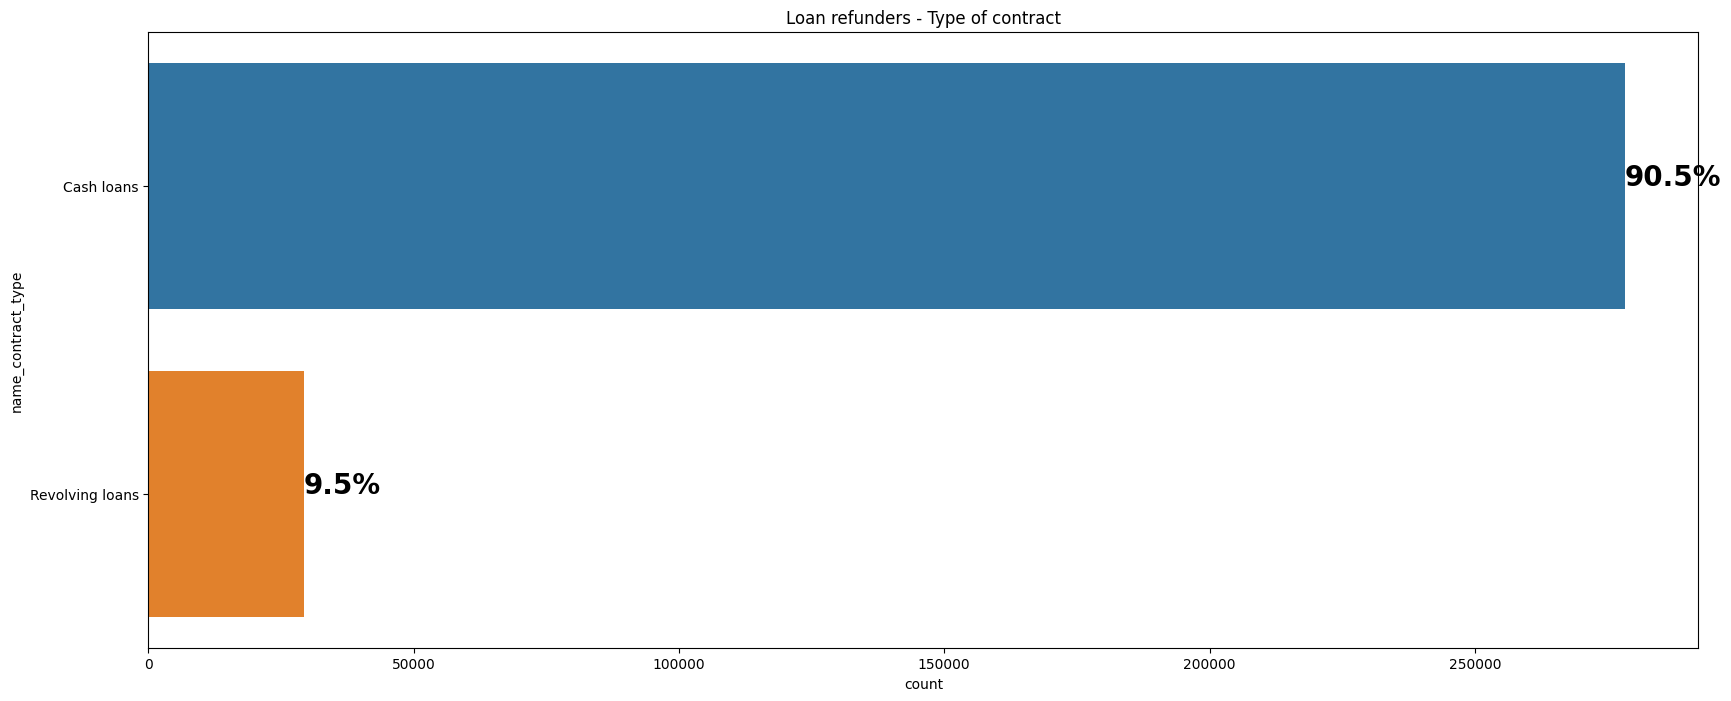

                                   -------------------------------------------------------


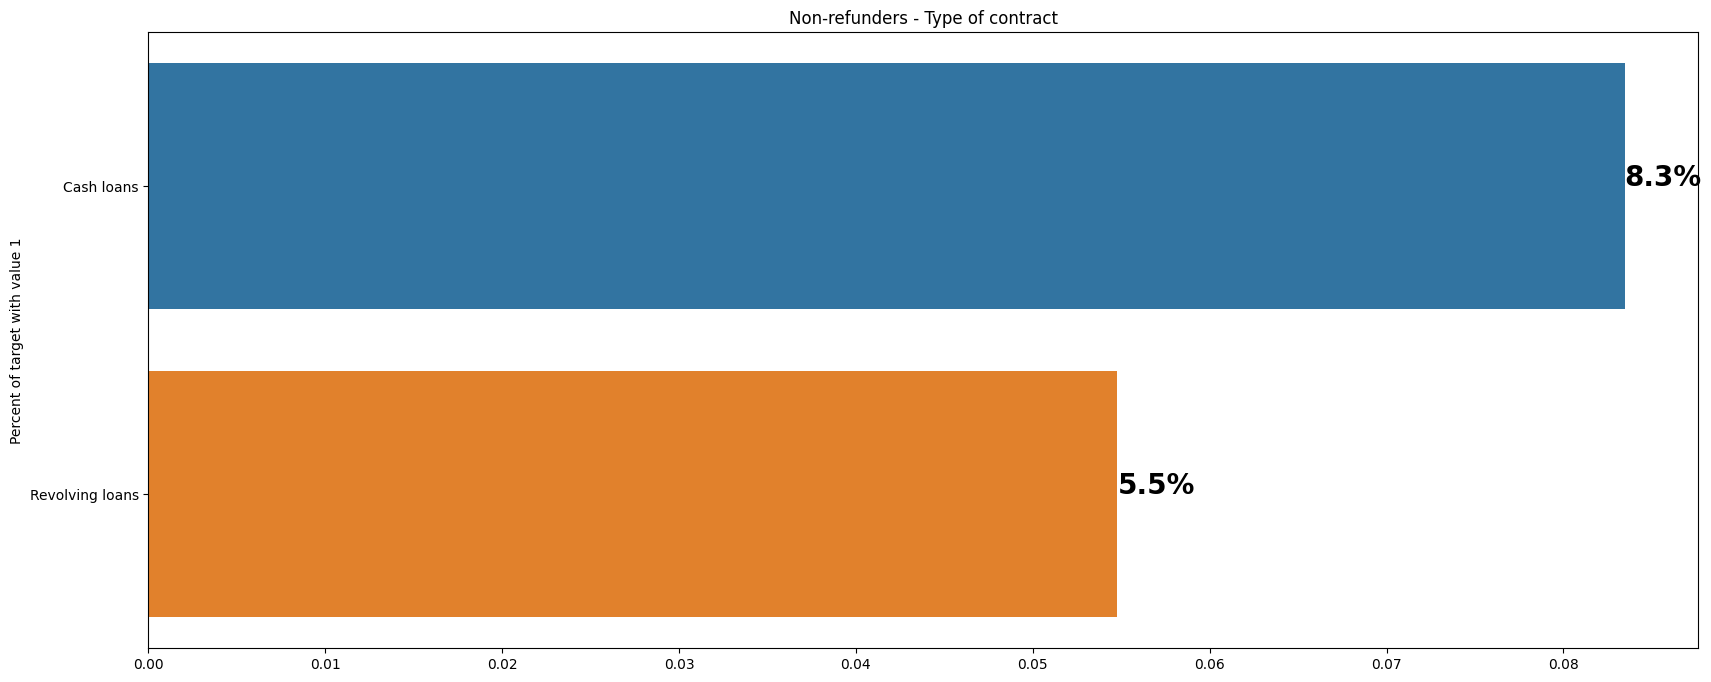

In [47]:

plot_stat(df, 'name_contract_type',"Loan refunders - Type of contract")
print("                                   -------------------------------------------------------")
plot_percent_target1(df, 'name_contract_type',"Non-refunders - Type of contract")

# Genre distribution description

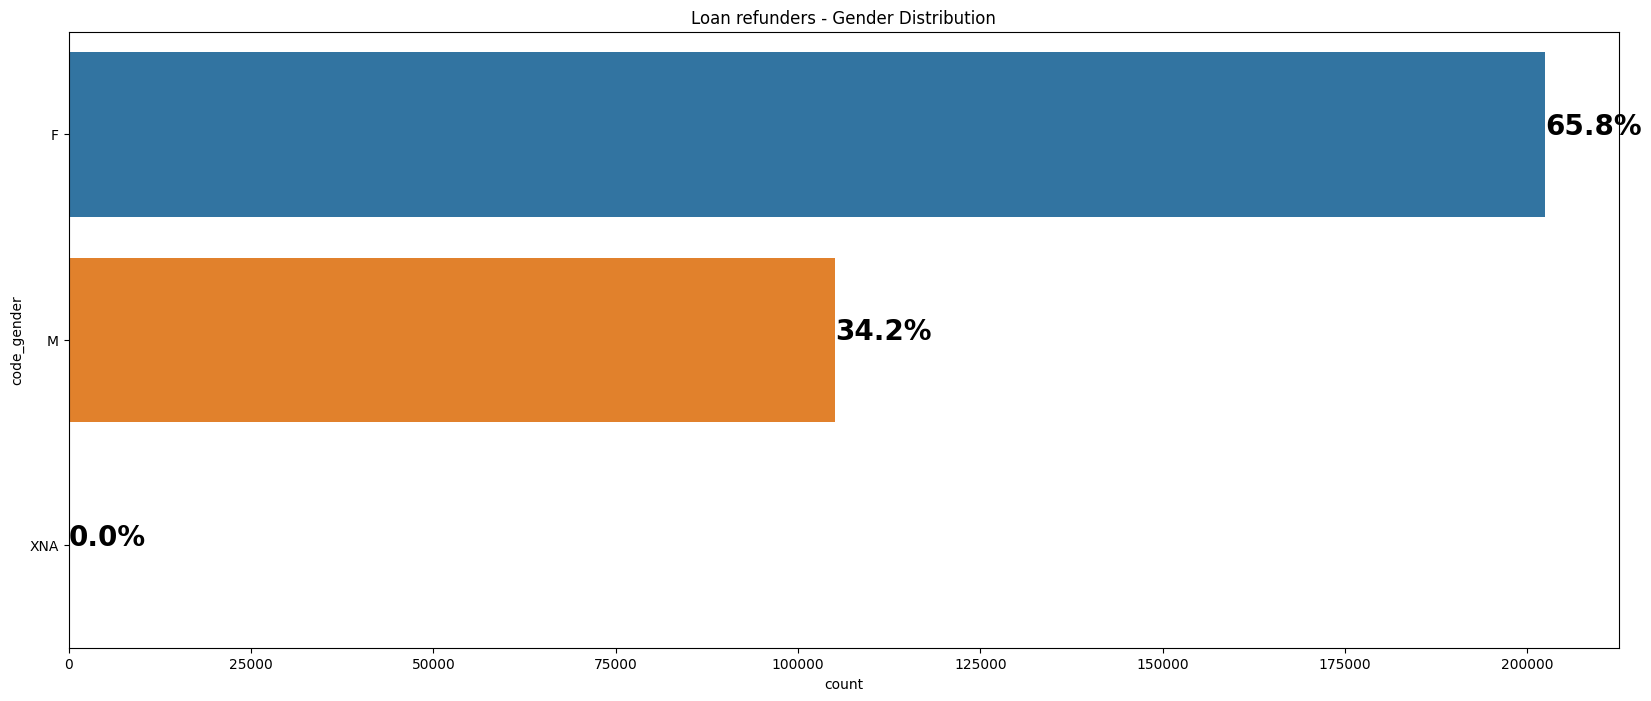

                                   -------------------------------------------------------


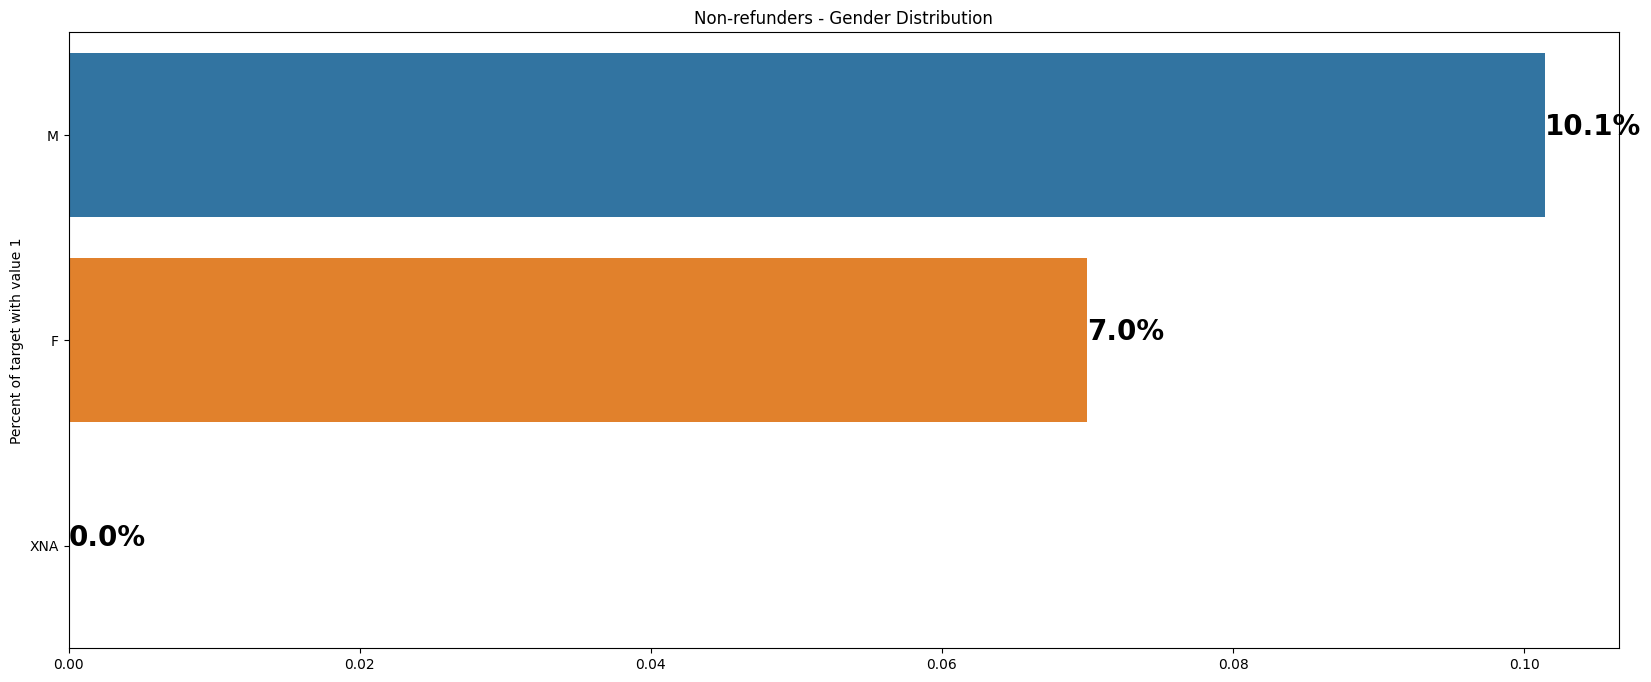

In [48]:

plot_stat(df, 'code_gender',"Loan refunders - Gender Distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(df, 'code_gender',"Non-refunders - Gender Distribution")

This means 10% of males do not pay their loans and 7% of females do not pay their loans

# Car ownership distribution

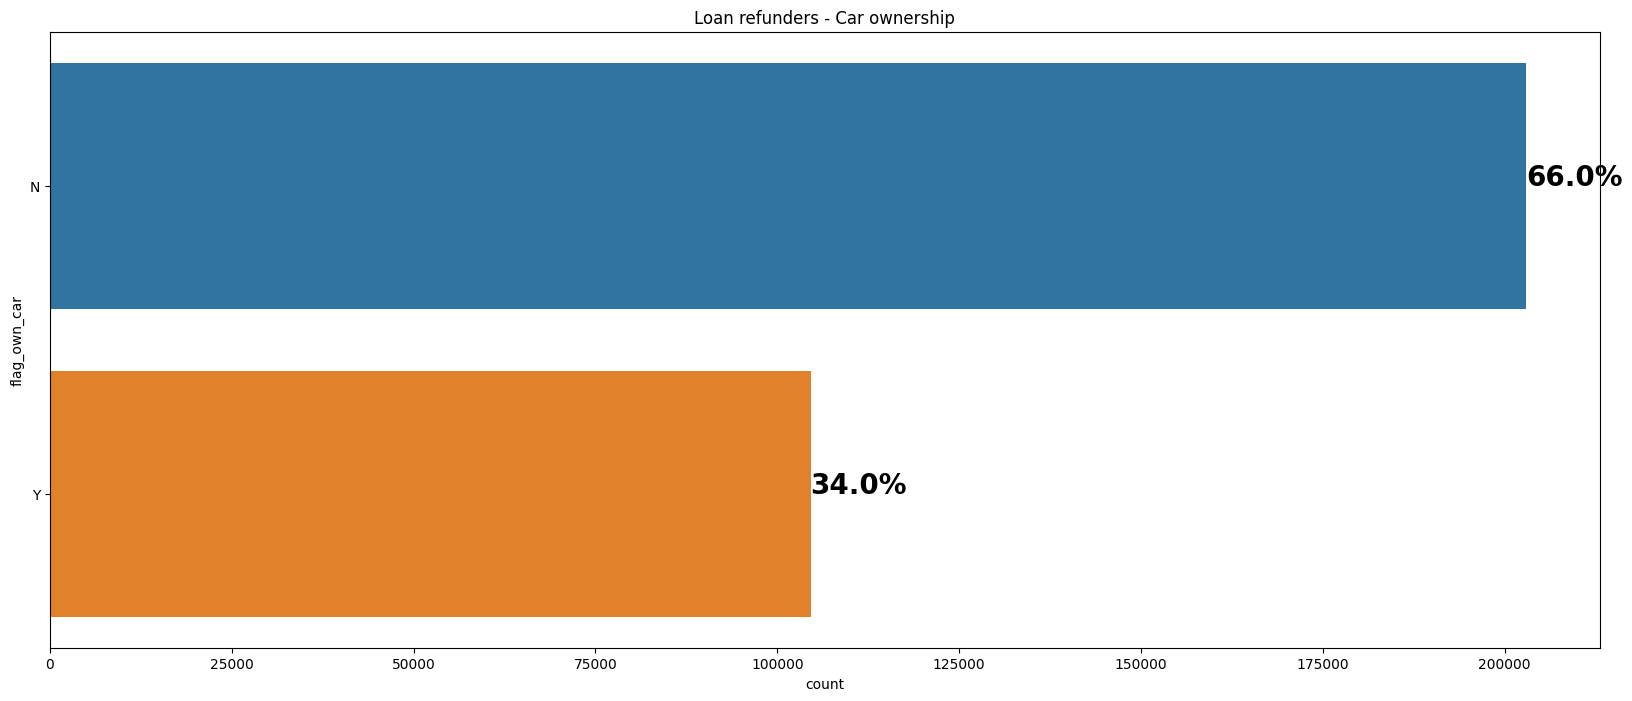

                                   -------------------------------------------------------


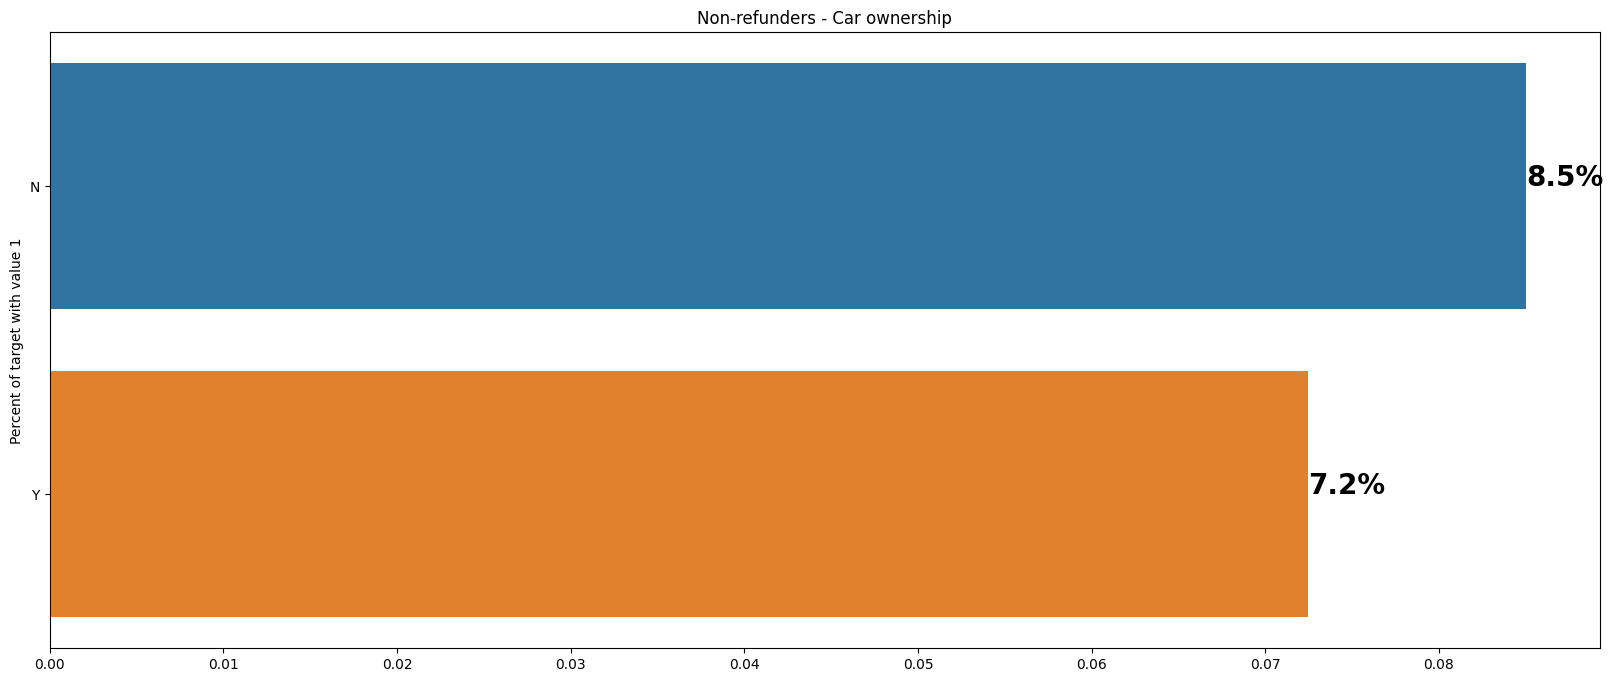

In [49]:

plot_stat(df, 'flag_own_car',"Loan refunders - Car ownership")
print("                                   -------------------------------------------------------")
plot_percent_target1(df, 'flag_own_car',"Non-refunders - Car ownership")

# Family status distribution description

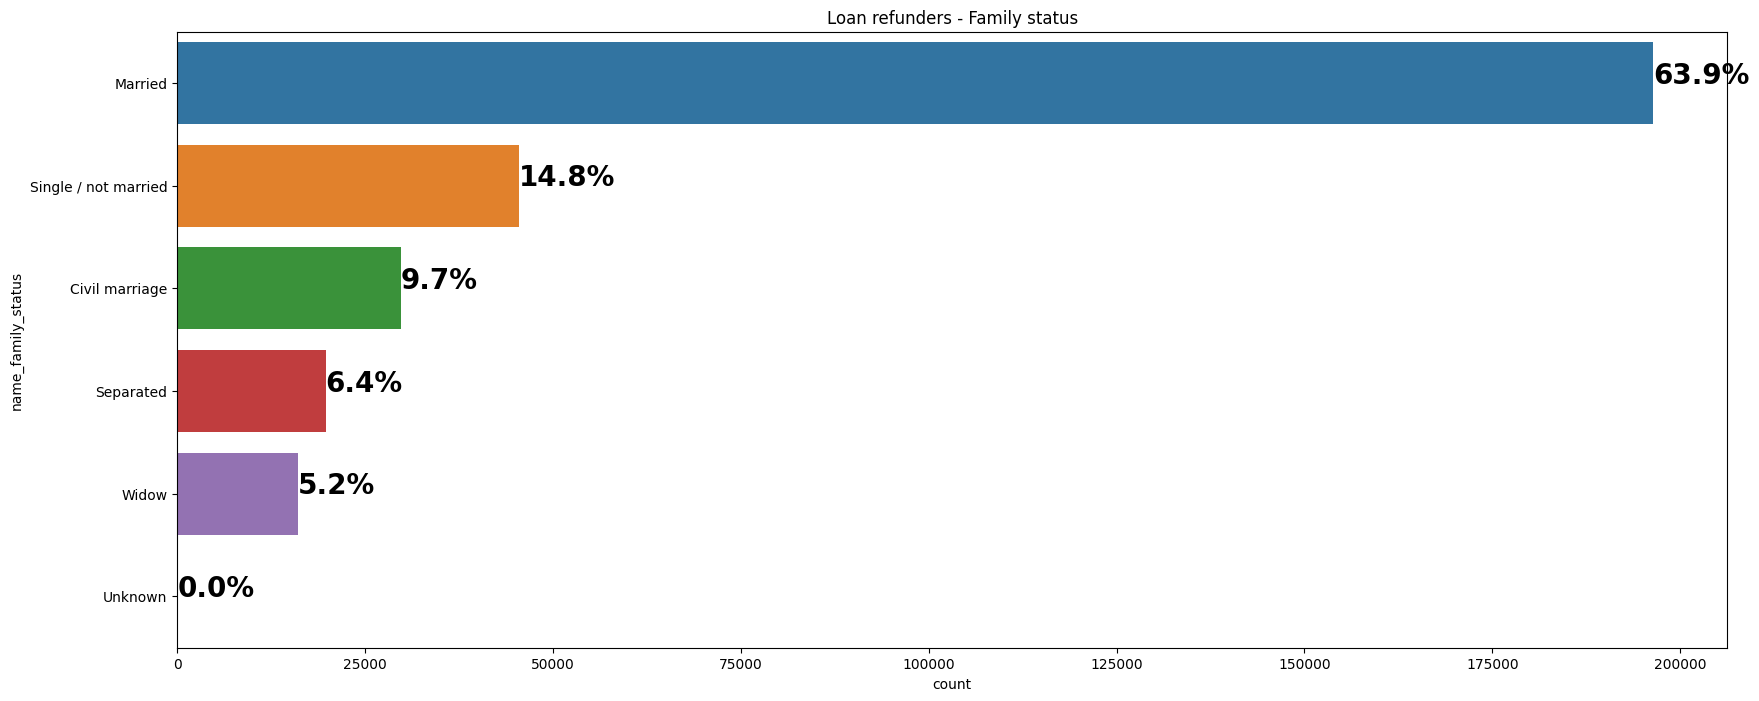

                                   -------------------------------------------------------


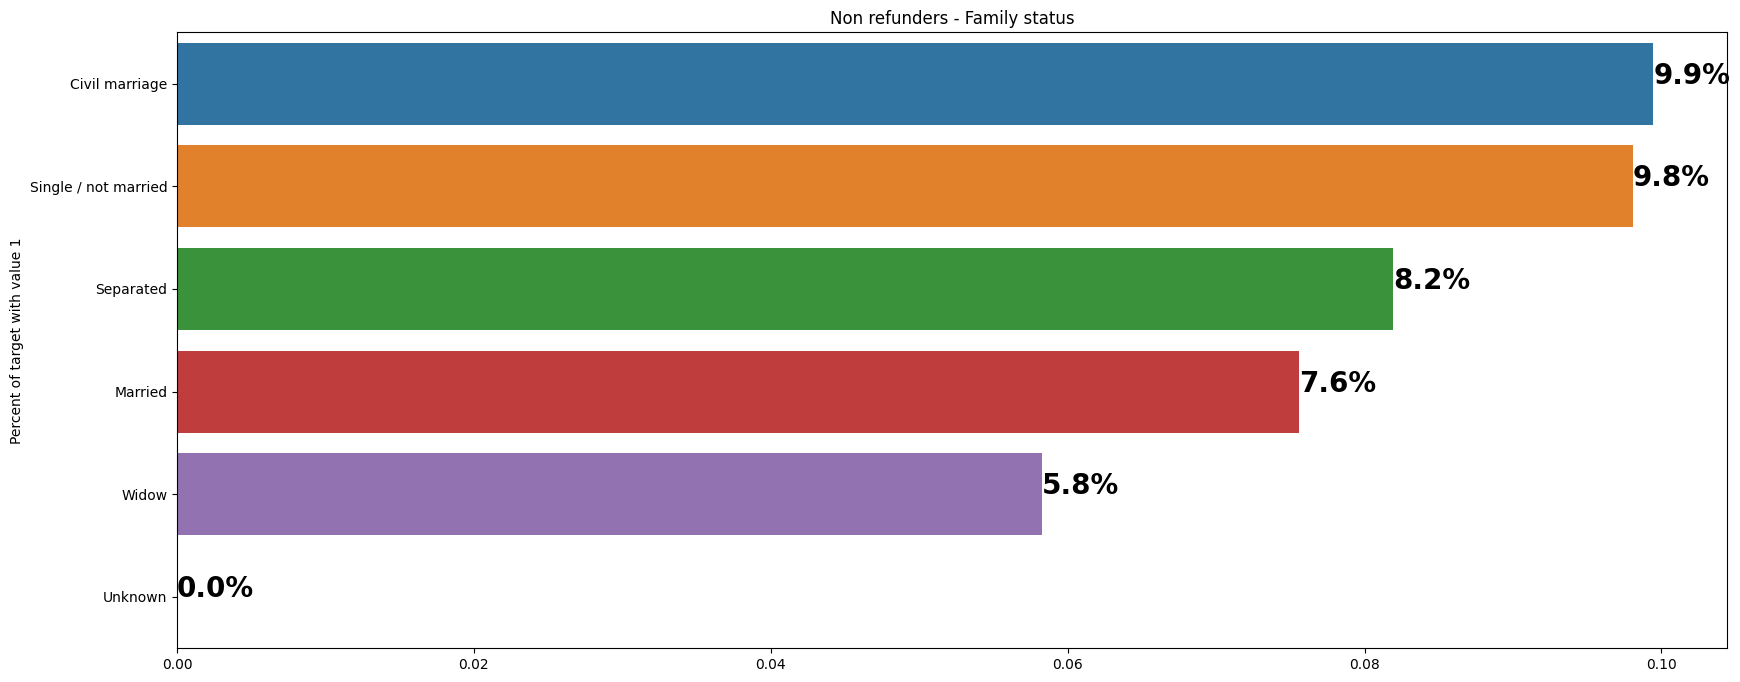

In [50]:
plot_stat(df, 'name_family_status',"Loan refunders - Family status")
print("                                   -------------------------------------------------------")
plot_percent_target1(df, 'name_family_status',"Non refunders - Family status")

# Income type distribution description

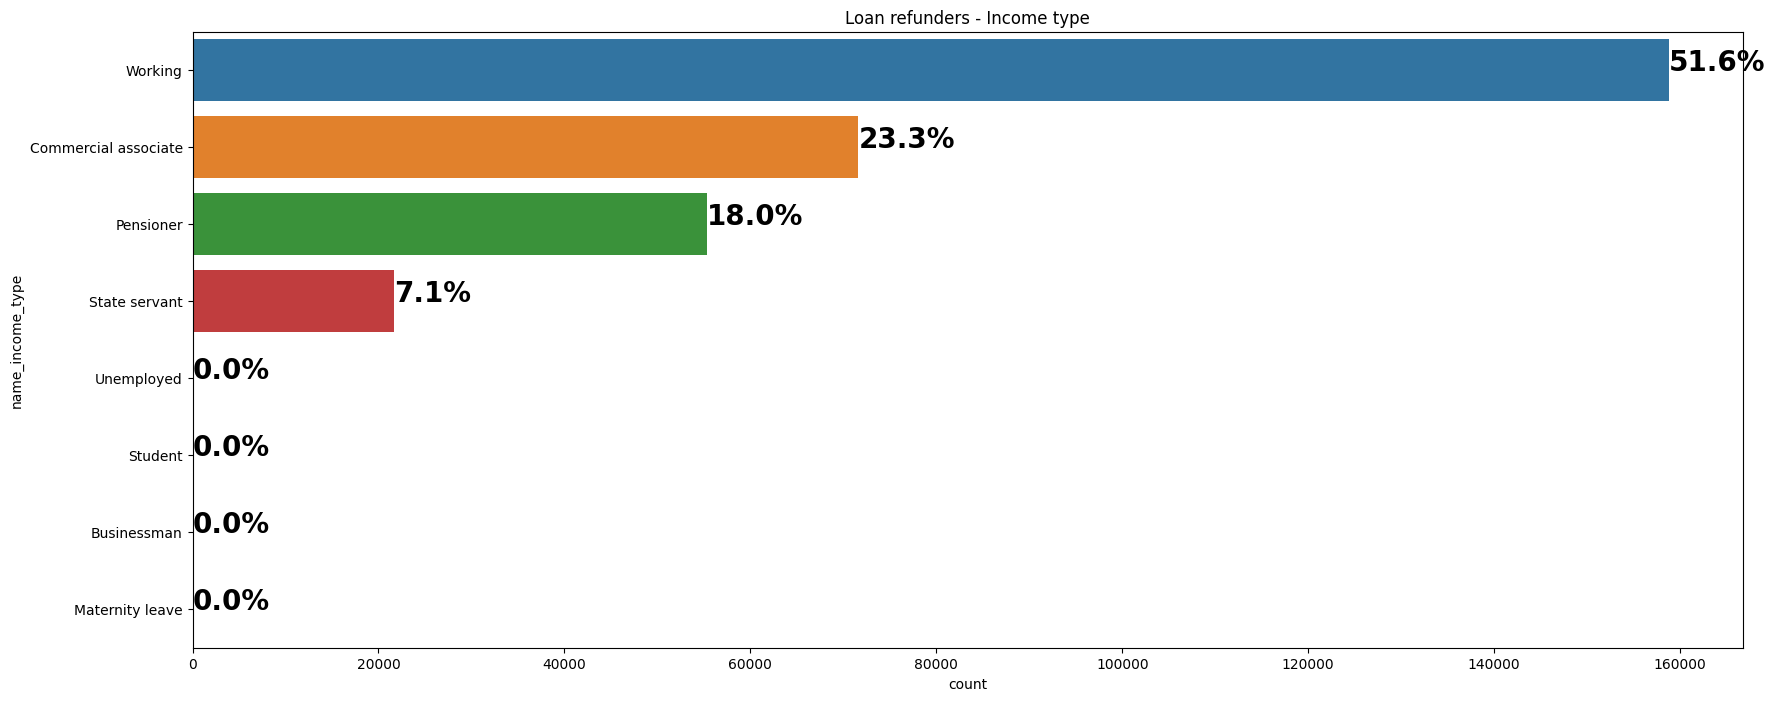

                                   -------------------------------------------------------


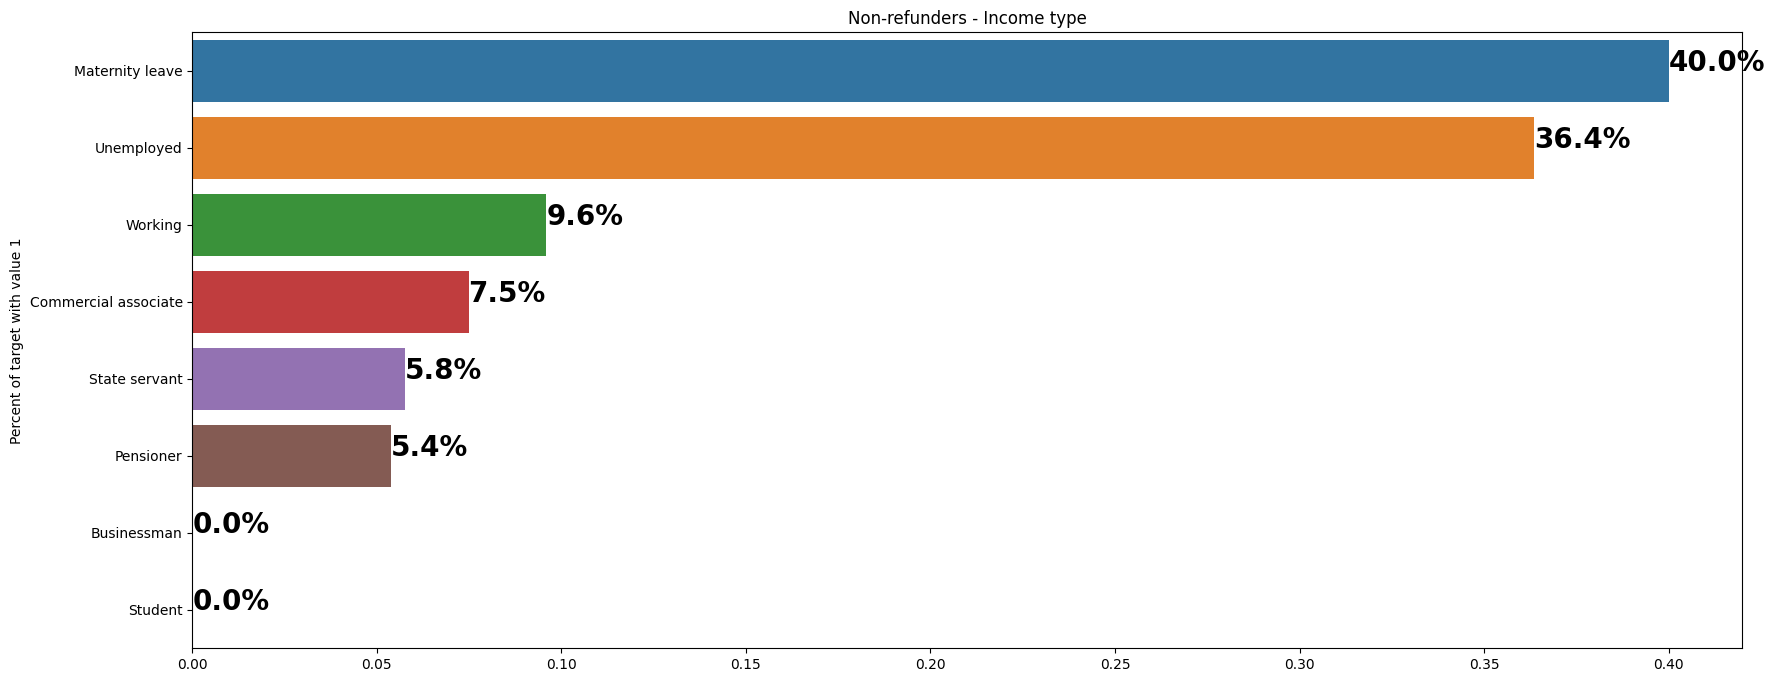

In [51]:

plot_stat(df, 'name_income_type',"Loan refunders - Income type")
print("                                   -------------------------------------------------------")
plot_percent_target1(df, 'name_income_type',"Non-refunders - Income type")

# Distribution of age by target

<ipython-input-52-aef3a81a1386>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




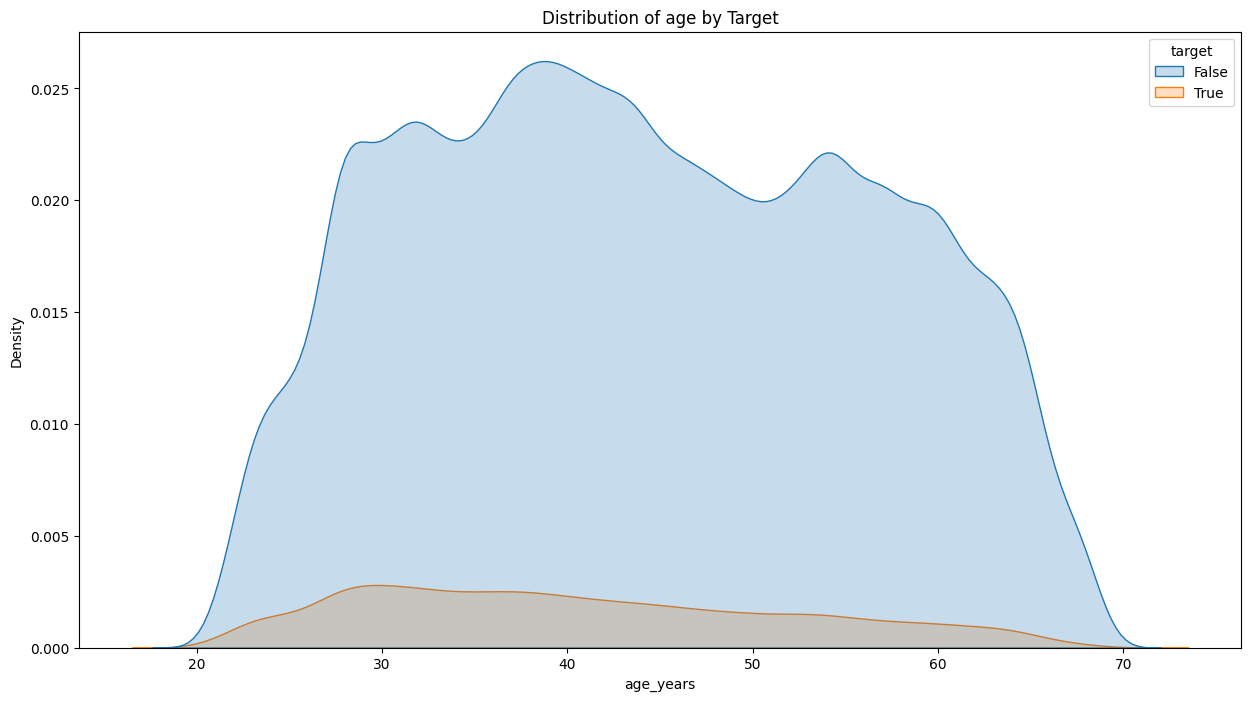

In [52]:
app_train['age_years'] = app_train['days_birth'] / -365

plt.figure(figsize=(15, 8))

sns.kdeplot(data=app_train, x='age_years', hue='target', shade=True )
plt.title(f'Distribution of age by Target')
plt.show()

# Distribution of AMT_CREDIT

<ipython-input-53-e40b99b9f656>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




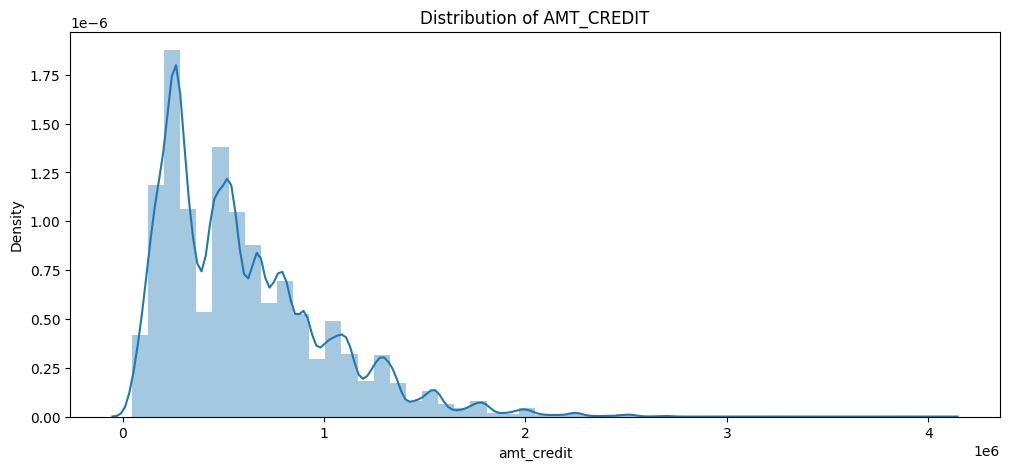

In [53]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(app_train["amt_credit"])

# Distribution of AMT_GOODS_PRICE

<ipython-input-54-83943ad51e35>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




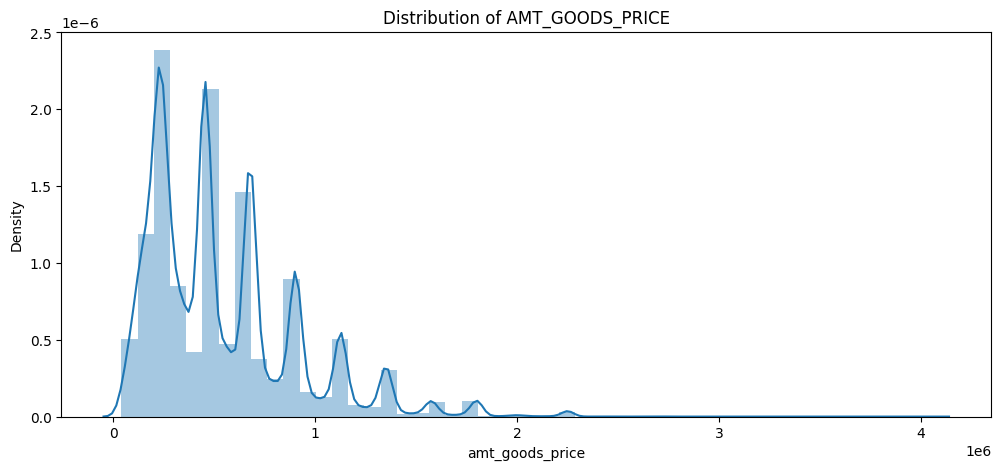

In [54]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_GOODS_PRICE")
ax = sns.distplot(app_train["amt_goods_price"].dropna())

In [55]:
def labelupdate(autotexts,labels):
  l=[]
  for i in range(len(labels)):
    l.append(str(autotexts[i]._text) + ' ' + str(labels[i]))
  return(l)

def plotpiechart(s):
  %matplotlib inline
  import random
  labels=list(df[s].unique())
  labels=[x for x in labels if (str(x)!='nan')]
  fracs1=[]
  fracs2=[]
  fracs3=[]
  for x in labels:
    count1 = sum(df[s]==x)
    fracs1.append(count1)
    count2 = sum(df[df['target']==0][s]==x)
    fracs2.append(count2)
    count3 = sum(df[df['target']==1][s]==x)
    fracs3.append(count3)
  colors=["#9c9ede", "#7375b5", "#4a5584", "#cedb9c", "#b5cf6b", "#8ca252", "#637939",
        "#e7cb94", "#e7ba52", "#bd9e39", "#8c6d31", "#e7969c", "#d6616b", "#ad494a",
        "#843c39", "#de9ed6", "#ce6dbd", "#a55194", "#7b4173","#1f77b4", "#aec7e8",
        "#ff7f0e", "#ffbb78", "#2ca02c", "#98df8a", "#d62728", "#ff9896", "#9467bd",
        "#c5b0d5", "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f", "#c7c7c7",
        "#bcbd22", "#dbdb8d", "#17becf", "#9edae5","#1f77b4", "#ff7f0e", "#2ca02c",
        "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
  colors=random.sample(colors, len(labels))
  plt.title("Total distribution")
  patches,texts,autotexts=plt.pie(fracs1, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,radius=1,textprops={'size': 'smaller'})
  l=labelupdate(autotexts,labels)
  plt.legend(patches,l, bbox_to_anchor=(1,0.5), loc="best", fontsize=10,bbox_transform=plt.gcf().transFigure)
  plt.show()
  plt.title("Loan-refunders")
  patches,texts,autotexts=plt.pie(fracs2, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,radius=1,textprops={'size': 'smaller'})
  l=labelupdate(autotexts,labels)
  plt.legend(patches,l, bbox_to_anchor=(1,0.5), loc="best", fontsize=10,bbox_transform=plt.gcf().transFigure)
  plt.show()
  plt.title("Non-refunders")
  patches,texts,autotexts=plt.pie(fracs3, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,textprops={'size': 'smaller'},radius=1)
  l=labelupdate(autotexts,labels)
  plt.legend(patches,l, bbox_to_anchor=(1,0.5), loc="best", fontsize=10,bbox_transform=plt.gcf().transFigure)
  plt.show()

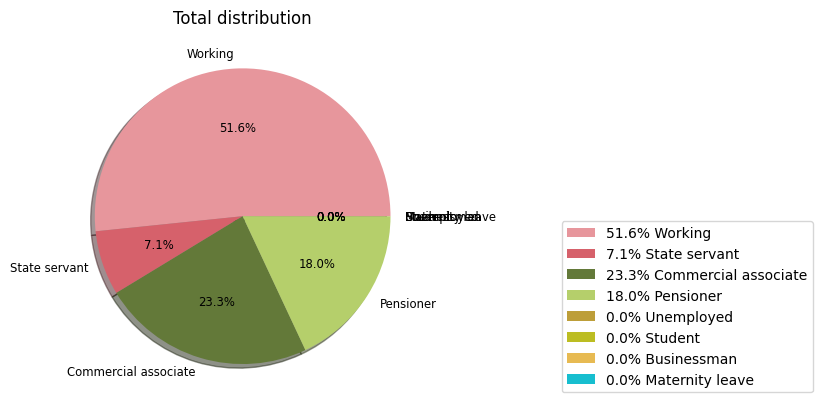

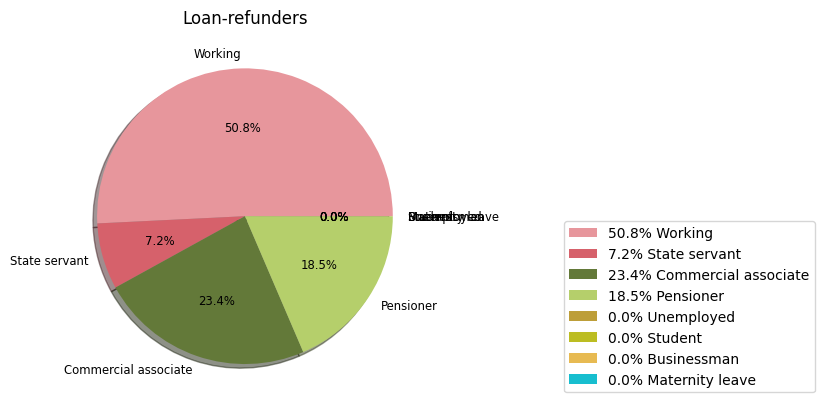

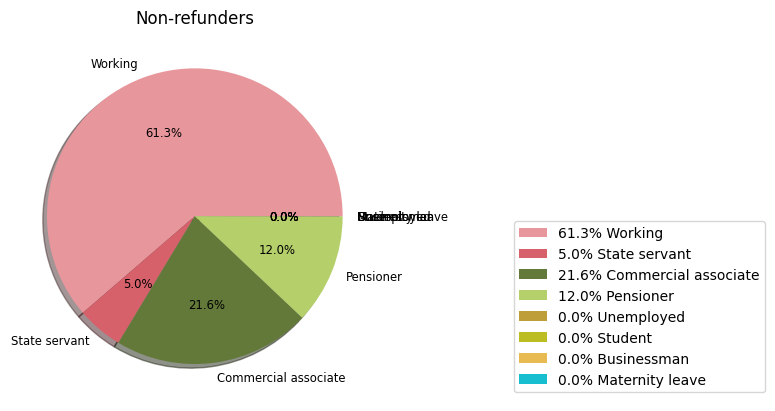

In [56]:
plotpiechart('name_income_type')

# Testing Random Forest Classifier model to get feature *importance*

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = df.drop(['target', 'sk_id_curr'], axis=1)
y = df['target']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Retrieve feature importances
importances = model.feature_importances_

# Map these back to feature names
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))

# Displaying feature importances
for name, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance}")

ext_source_2: 0.03609953786903874
ext_source_3: 0.029426613437240227
days_birth: 0.020381819389874066
days_id_publish: 0.019696211280794605
days_registration: 0.018927469372844116
bureau_days_credit: 0.018683780979773534
prev_apps_days_first_due: 0.017771584791928433
amt_annuity: 0.017435208199394456
ext_source_1: 0.017045327881072218
bureau_days_credit_enddate: 0.016708871395407922
bureau_days_credit_update: 0.016616865777945418
days_last_phone_change: 0.016567086235194407
prev_apps_hour_appr_process_start: 0.01625395732590101
inst_num_instalment_number: 0.016246901307528212
bureau_amt_credit_sum: 0.016124737131845212
prev_apps_sellerplace_area: 0.016068246011682562
bureau_sk_id_bureau: 0.015783566479445933
region_population_relative: 0.015320763888935742
prev_apps_cnt_payment: 0.015237134381073478
sk_id_prev: 0.015016899711659934
amt_income_total: 0.014858919215560998
bureau_days_enddate_fact: 0.014641873935000976
inst_sk_id_prev: 0.014624650286228662
inst_num_instalment_version: 0.0

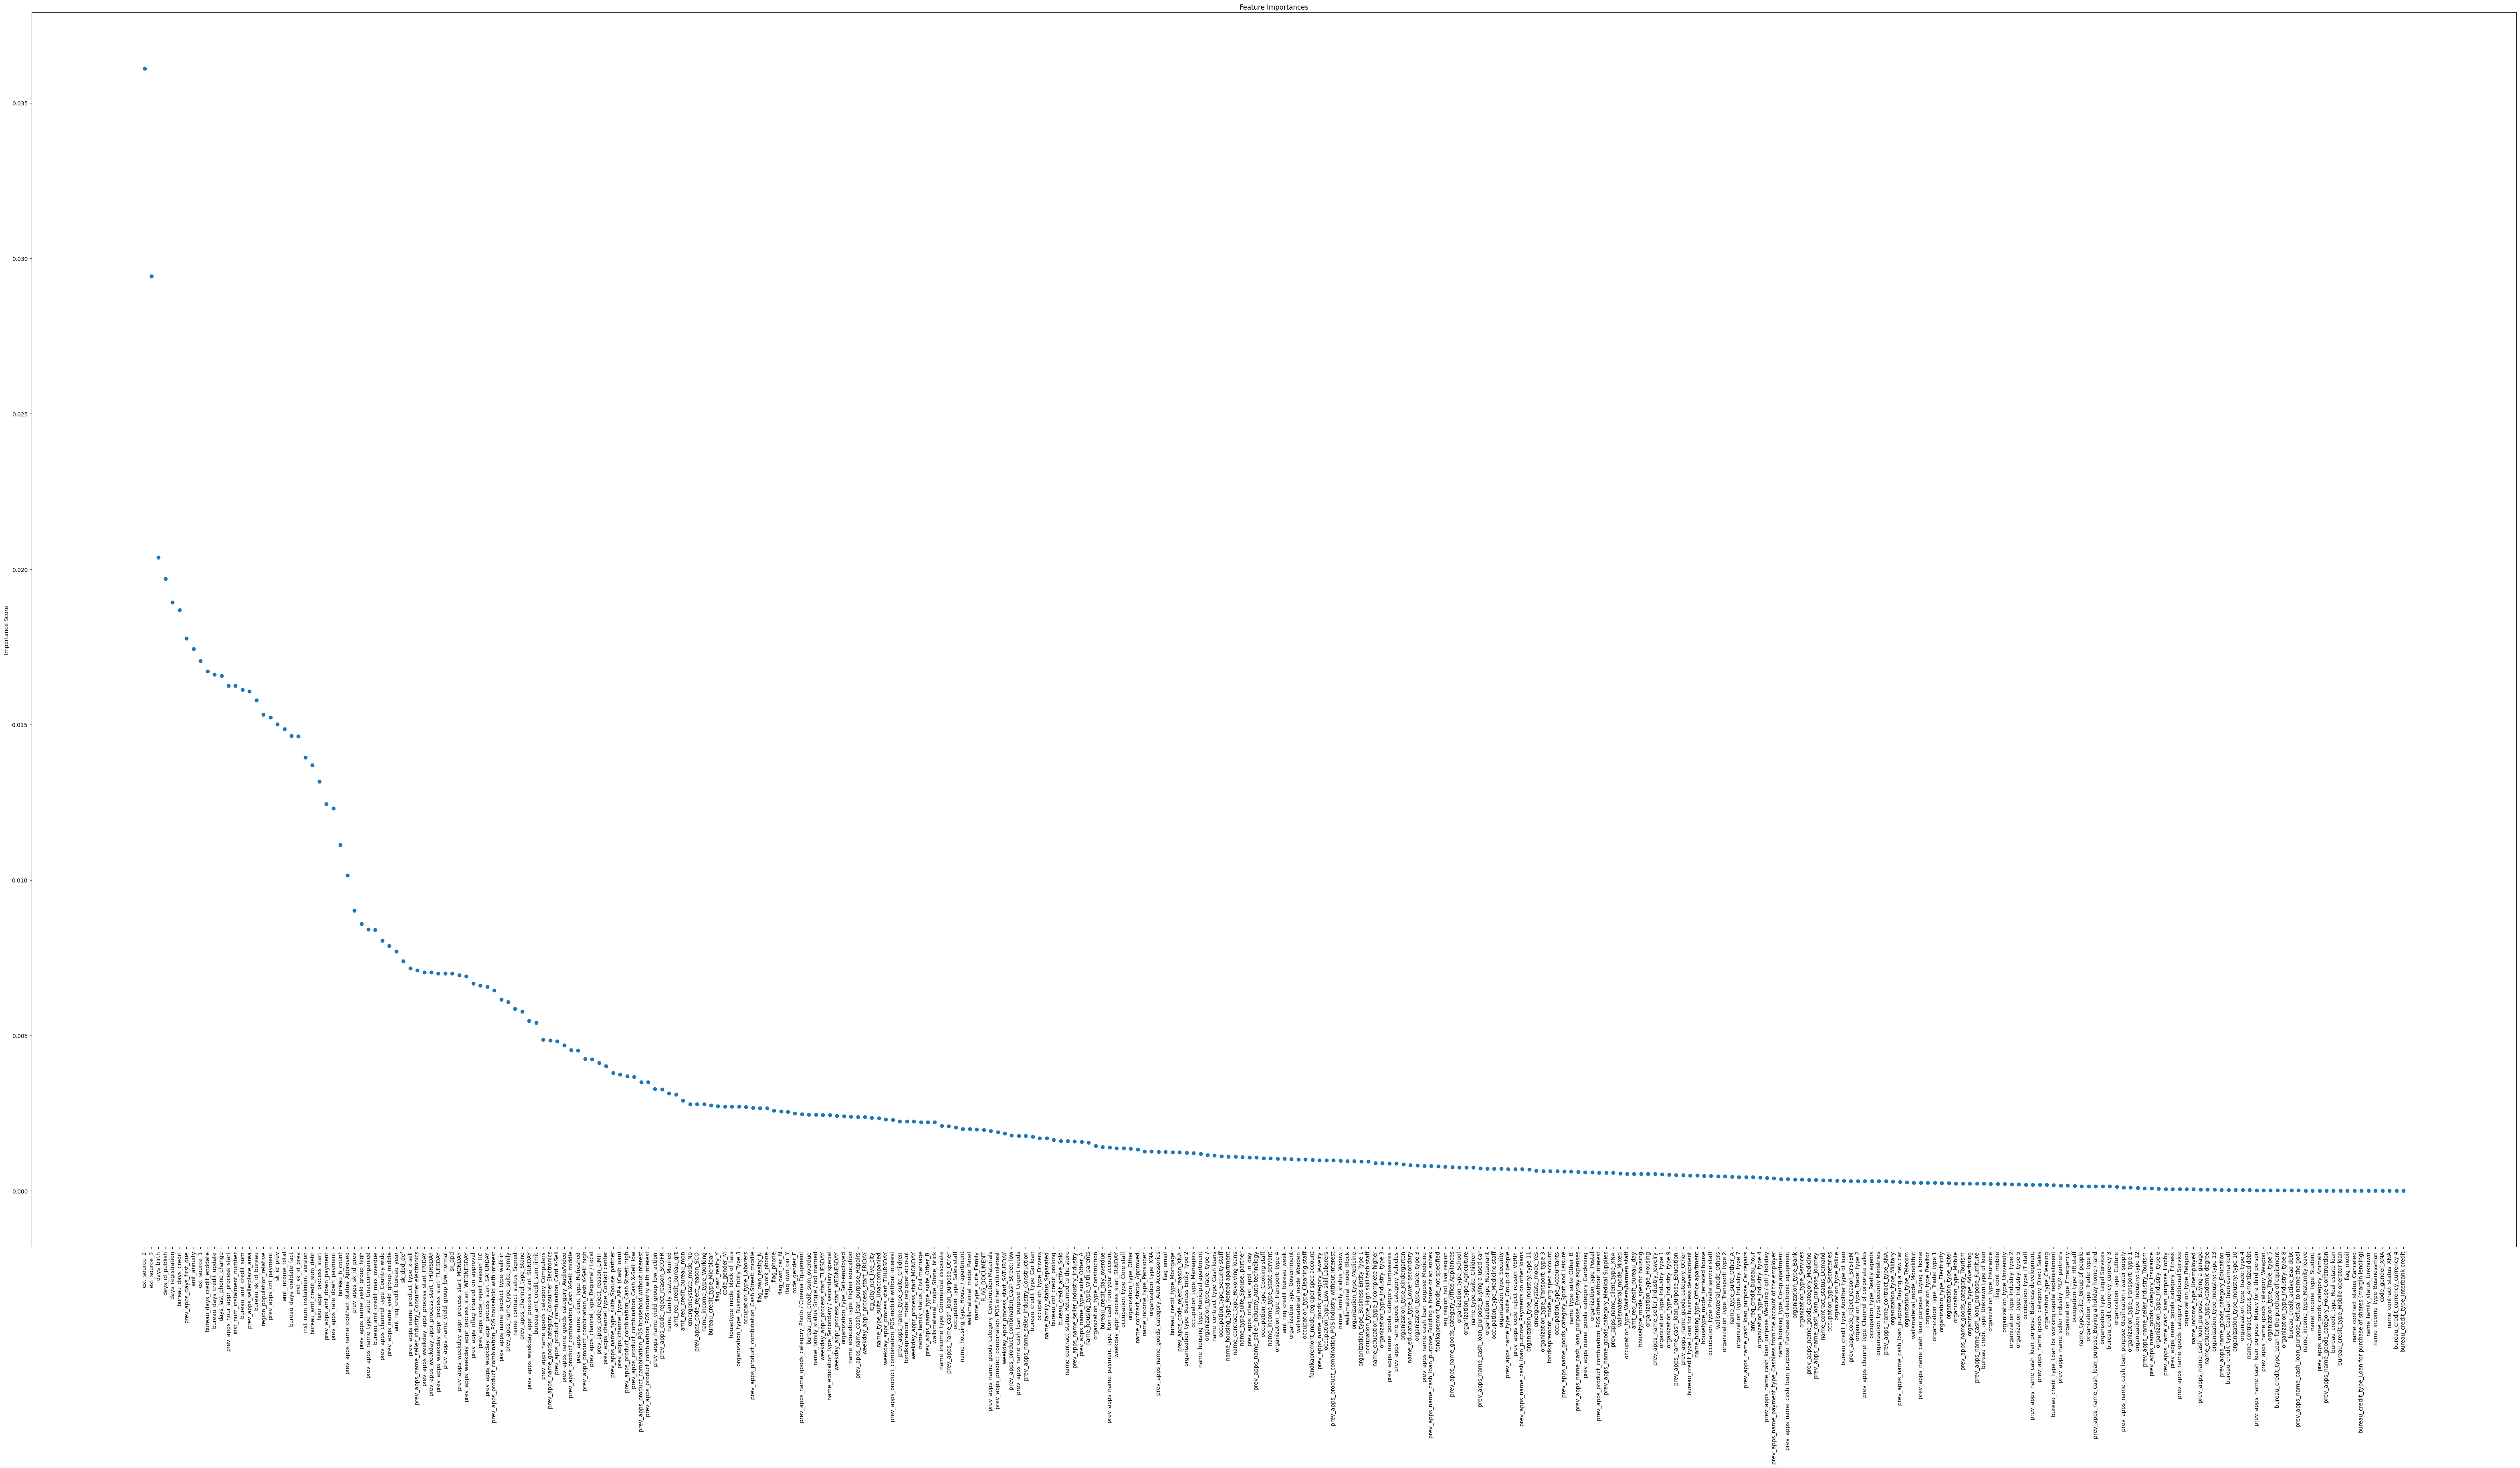

In [58]:

indices = np.argsort(importances)[::-1]
sorted_names = [feature_names[i] for i in indices]

# Create the plot
plt.figure(figsize=(80, 40))

# Creating y_ticks for the number of features
y_ticks = np.arange(0, len(sorted_names))

# Scatter plot
plt.scatter(y_ticks, importances[indices])

# Set the feature names as x-tick labels
plt.xticks(y_ticks, sorted_names, rotation='vertical')

# Setting labels and title
plt.ylabel('Importance Score')
plt.title("Feature Importances")

# Show the plot
plt.show()

This figure plots every column and its importance feature for this test model

Plotting the distribution of the 10 most important features of this model

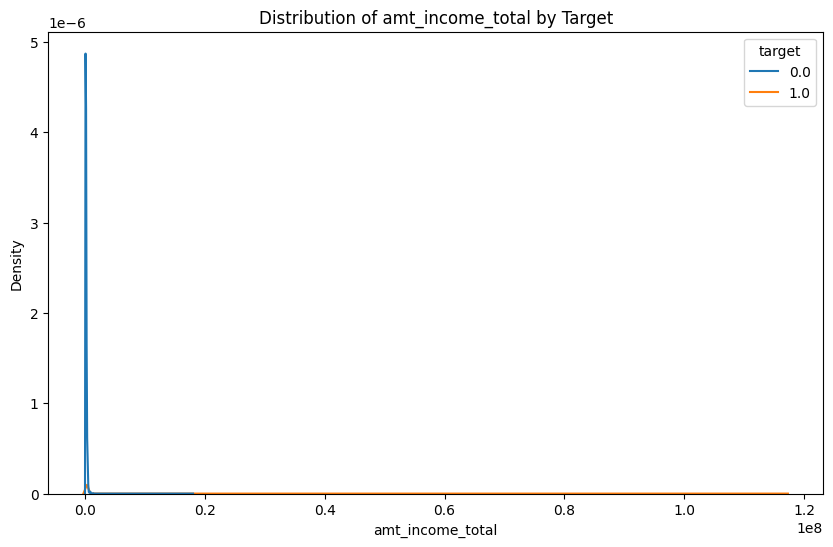

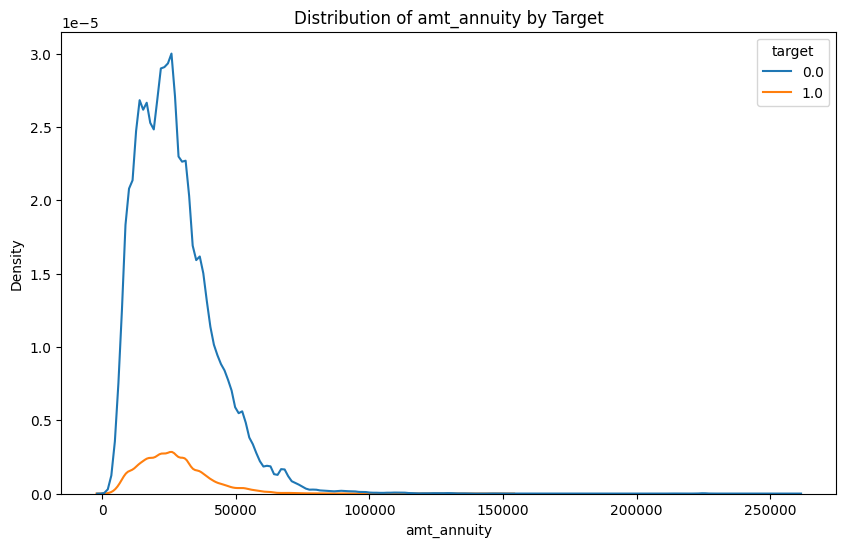

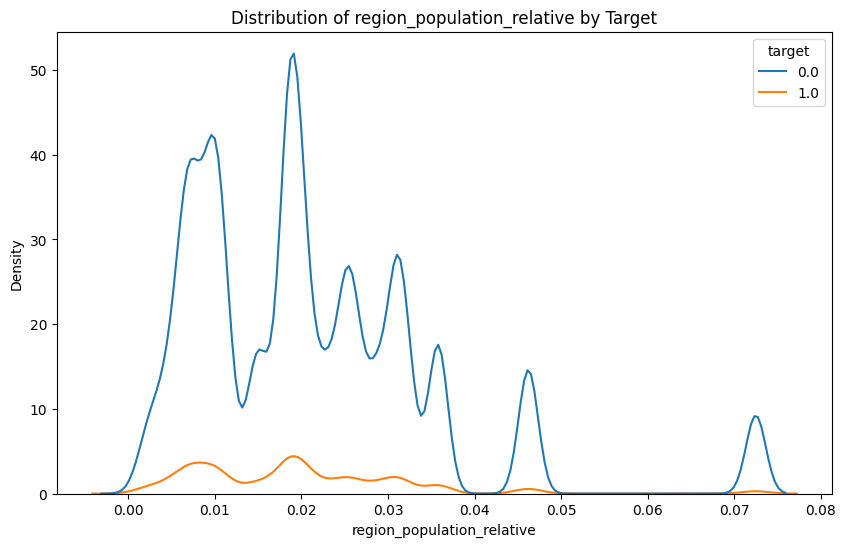

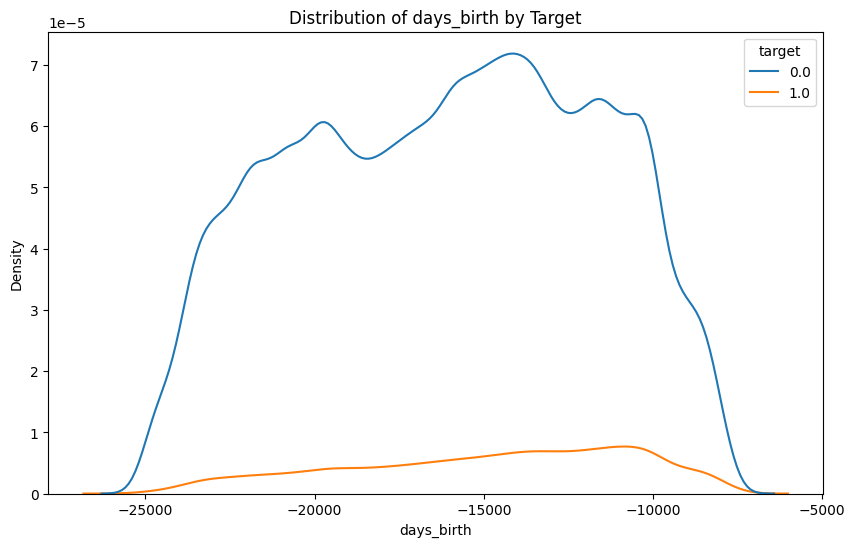

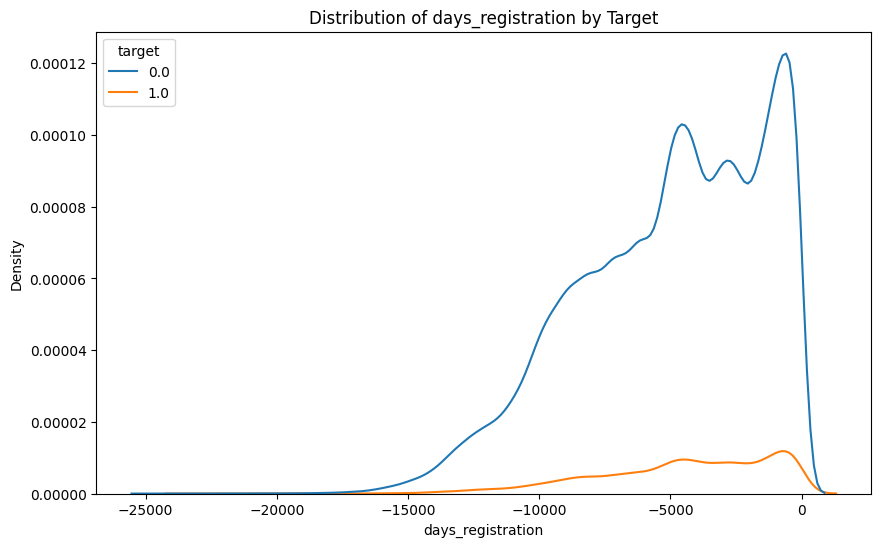

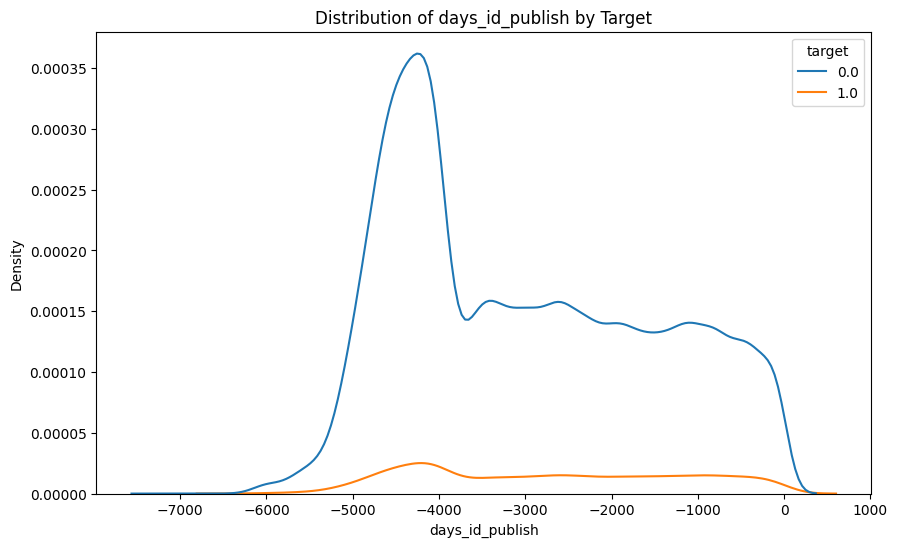

<ipython-input-59-85b834d6fee6>:3: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



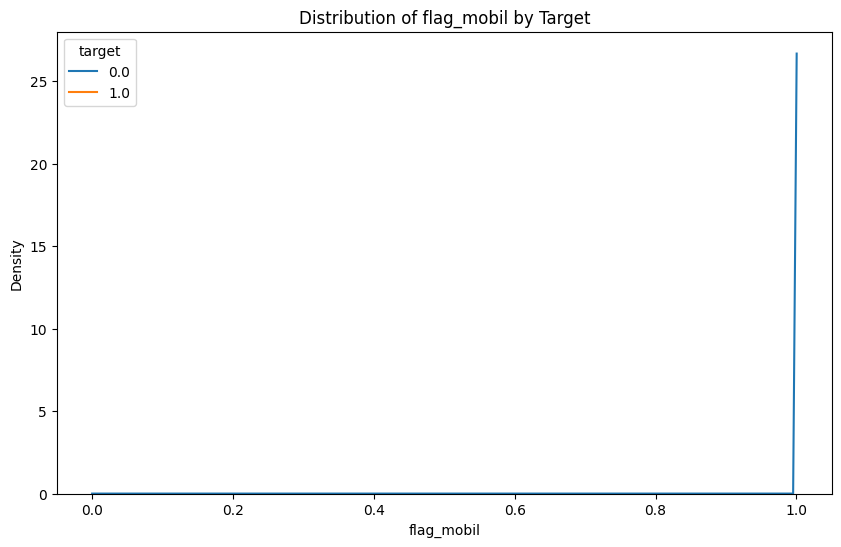

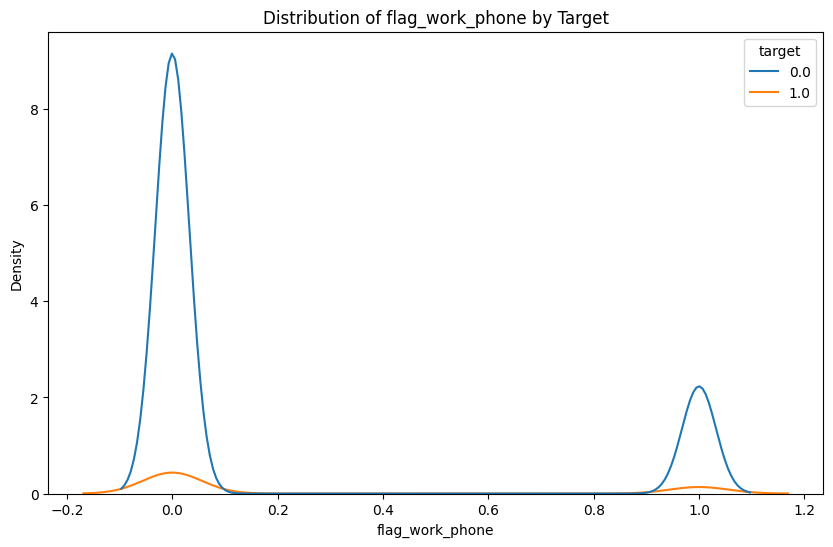

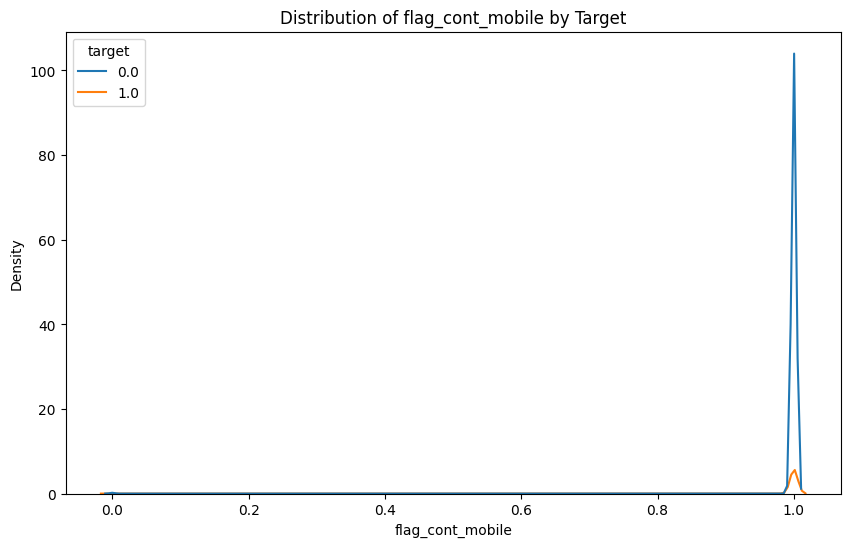

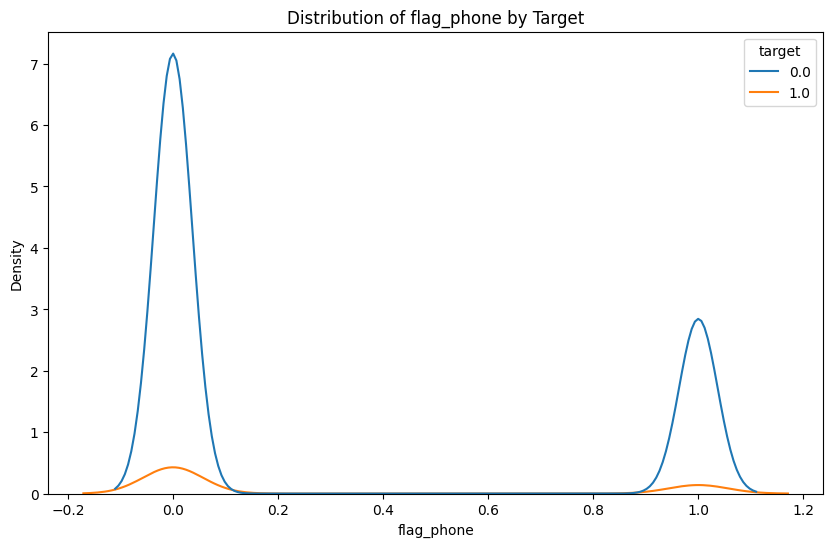

In [59]:
for feature in feature_names[:10]:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='target')
    plt.title(f'Distribution of {feature} by Target')
    plt.show()


# PCA column Reduction

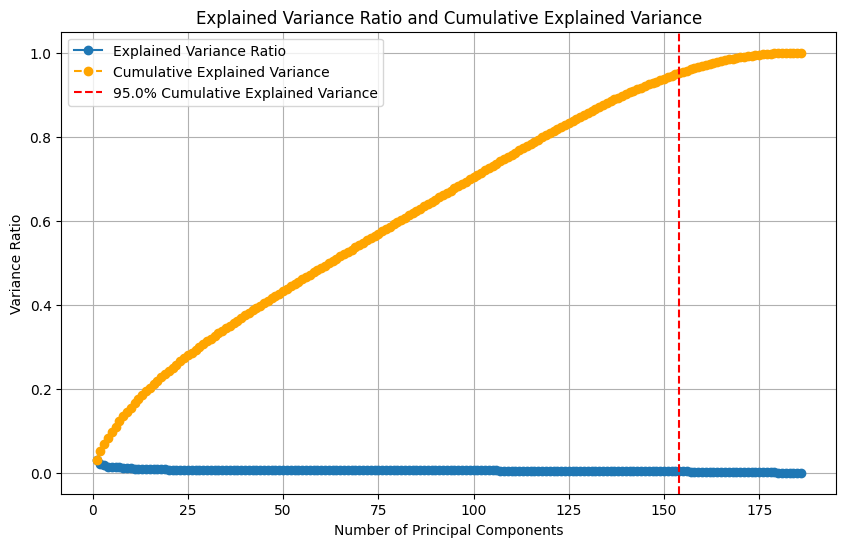

Number of components needed for 95.0% cumulative explained variance: 154


In [61]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the numeric data (mean=0 and variance=1)
scaler = StandardScaler()
numeric_columns_standardized = scaler.fit_transform(df.select_dtypes(include='number'))

# Create a PCA instance
pca = PCA()

# Fit the data to the PCA model
pca.fit(numeric_columns_standardized)

# Transform the numeric data to its principal components
numeric_columns_pca = pca.transform(numeric_columns_standardized)

# Create a DataFrame from the principal components
df_numeric_pca = pd.DataFrame(data=numeric_columns_pca, columns=[f'PC{i+1}' for i in range(numeric_columns_pca.shape[1])])

# Display the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Find the number of components for 95% cumulative explained variance
target_explained_variance = 0.95
num_components_95_percent = next(i for i, val in enumerate(cumulative_explained_variance, 1) if val >= target_explained_variance)

# Plot the explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='orange', label='Cumulative Explained Variance')

# Mark the point where 95% cumulative explained variance is reached
plt.axvline(x=num_components_95_percent, color='red', linestyle='--', label=f'{target_explained_variance * 100}% Cumulative Explained Variance')

# Add labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Ratio')
plt.title('Explained Variance Ratio and Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

# Display the number of components needed for 95% cumulative explained variance
print(f"Number of components needed for {target_explained_variance * 100}% cumulative explained variance: {num_components_95_percent}")

In [62]:
data_describe(df.select_dtypes(include="number"))

SUMMARY FILES…


Rows  Columns  %NaN  %Duplicate  object_dtype  \
merged dataframe  307511      186   0.0         0.0             0   

                  float_dtype  int_dtype  bool_dtype  MB_Memory  
merged dataframe          186          0           0    438.725

So we can use 154 principal components instead of 186, and we will still capture 95% of the numeric information